<a href="https://colab.research.google.com/github/jm12312/Stock-Market-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
raw_full_df = pd.read_csv("/content/drive/MyDrive/datasets/Stocks_data.csv")
raw_full_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
raw_full_df = raw_full_df[raw_full_df['Company']!="NIFTY50_all"]

In [ ]:
# !pip install --upgrade yfinance

In [ ]:
# import yfinance as yf

# # List of stock symbols (tickers) for companies in India
# # For example: TCS, Reliance, Infosys, HDFC Bank, etc.
# indian_stocks = ['TCS.NS', 'RELIANCE.NS', 'INFY.NS', 'HDFCBANK.NS']

# # Fetch the data for the given tickers
# data = yf.download(indian_stocks, period='max', interval='1d')

# # Print the fetched data
# # print(data)

# # Fetch a specific stock's data
# tcs_data = yf.Ticker('TCS.NS')

# # Get historical market data for TCS
# tcs_history = tcs_data.history(period="max", interval="1d")
# #pd.DataFrame(tcs_history)
# #pd.DataFrame(data)


In [ ]:
# pd.DataFrame(data)

In [ ]:
# pd.DataFrame(tcs_history)

In [ ]:
# import yfinance as yf

# # Define the stock symbol (for example, TCS from NSE)
# ticker = "TCS.NS"

# # Create a Ticker object for the stock
# stock = yf.Ticker(ticker)

# # Get the latest available stock data
# stock_data = stock.history(period="1d", interval="1m")

# # Print the latest stock data
# print(stock_data.tail(10))  # Show the last 10 data points


In [ ]:
# last_updated = stock_data.index[-1]
# print(f"Last updated: {last_updated}")

In [ ]:
# !pip install requests


In [ ]:
raw_full_df.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Company'],
      dtype='object')

In [ ]:
raw_full_df = raw_full_df[['Date', 'Company', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover']]

In [ ]:
raw_full_df['Next Close'] = raw_full_df.groupby("Company")['Close'].shift(-1)

Trying gain as target variable

In [ ]:
# raw_full_df['Next Close'] = raw_full_df['Next Close'] - raw_full_df['Close']

In [ ]:
raw_full_df

Date    Company  Prev Close    Open    High     Low    Last  \
0       2000-01-03   HDFCBANK      157.40  166.00  170.00  166.00  170.00   
1       2000-01-04   HDFCBANK      170.00  182.00  183.45  171.00  174.00   
2       2000-01-05   HDFCBANK      173.80  170.00  173.90  165.00  168.00   
3       2000-01-06   HDFCBANK      166.95  168.00  170.00  165.30  168.95   
4       2000-01-07   HDFCBANK      168.30  162.15  171.00  162.15  170.75   
...            ...        ...         ...     ...     ...     ...     ...   
470379  2021-04-26  POWERGRID      211.15  208.20  216.45  208.20  215.75   
470380  2021-04-27  POWERGRID      215.80  216.05  220.50  215.80  216.40   
470381  2021-04-28  POWERGRID      216.65  218.80  221.70  216.30  221.35   
470382  2021-04-29  POWERGRID      220.90  223.10  223.65  219.05  219.80   
470383  2021-04-30  POWERGRID      220.15  217.75  222.30  216.65  220.35   

         Close    VWAP    Volume      Turnover  Next Close  
0       170.00  169.52     33259  5.638122e+11      173.80  
1       173.80  174.99    168710  2.952261e+12      166.95  
2       166.95  169.20    159820  2.704094e+12      168.30  
3       168.30  168.44     85026  1.432166e+12      168.35  
4       168.35  166.79     85144  1.420158e+12      165.90  
...        ...     ...       ...           ...         ...  
470379  215.80  213.23  10765892  2.295642e+14      216.65  
470380  216.65  217.89   8589721  1.871605e+14      220.90  
470381  220.90  219.20   9215766  2.020103e+14      220.15  
470382  220.15  220.60   8303610  1.831748e+14      220.05  
470383  220.05  220.24   9504624  2.093328e+14         NaN  

[235192 rows x 12 columns]

In [ ]:
raw_full_df["Next Close"].describe()

count    235143.000000
mean       1266.627914
std        2582.205457
min           9.150000
25%         274.375000
50%         566.750000
75%        1242.500000
max       32861.950000
Name: Next Close, dtype: float64

## **EDA**

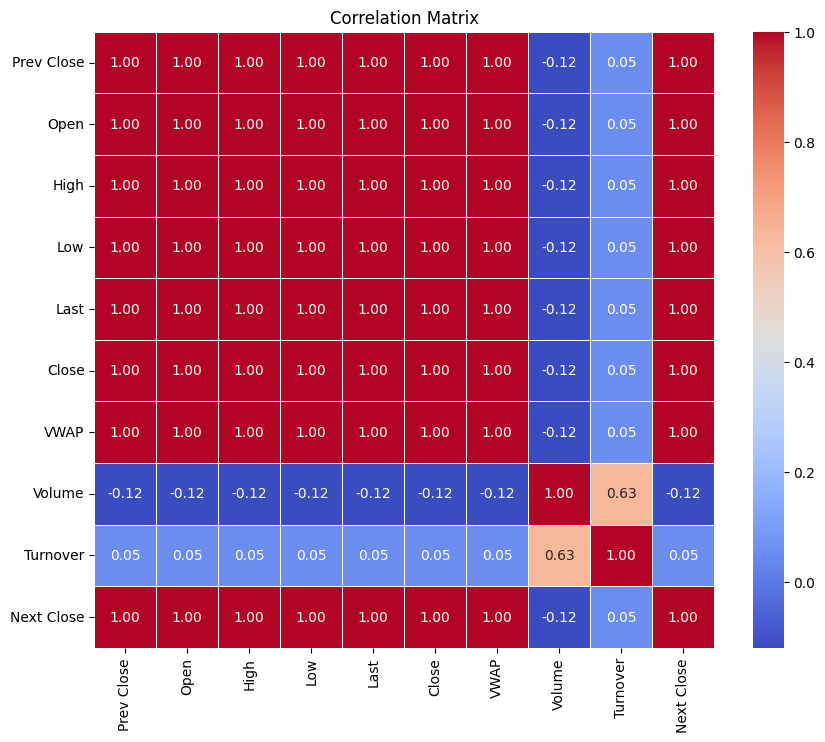

In [ ]:
corr_matrix = raw_full_df.drop(columns=["Date", "Company"]).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Optional: Adjust the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

(235192, 10)


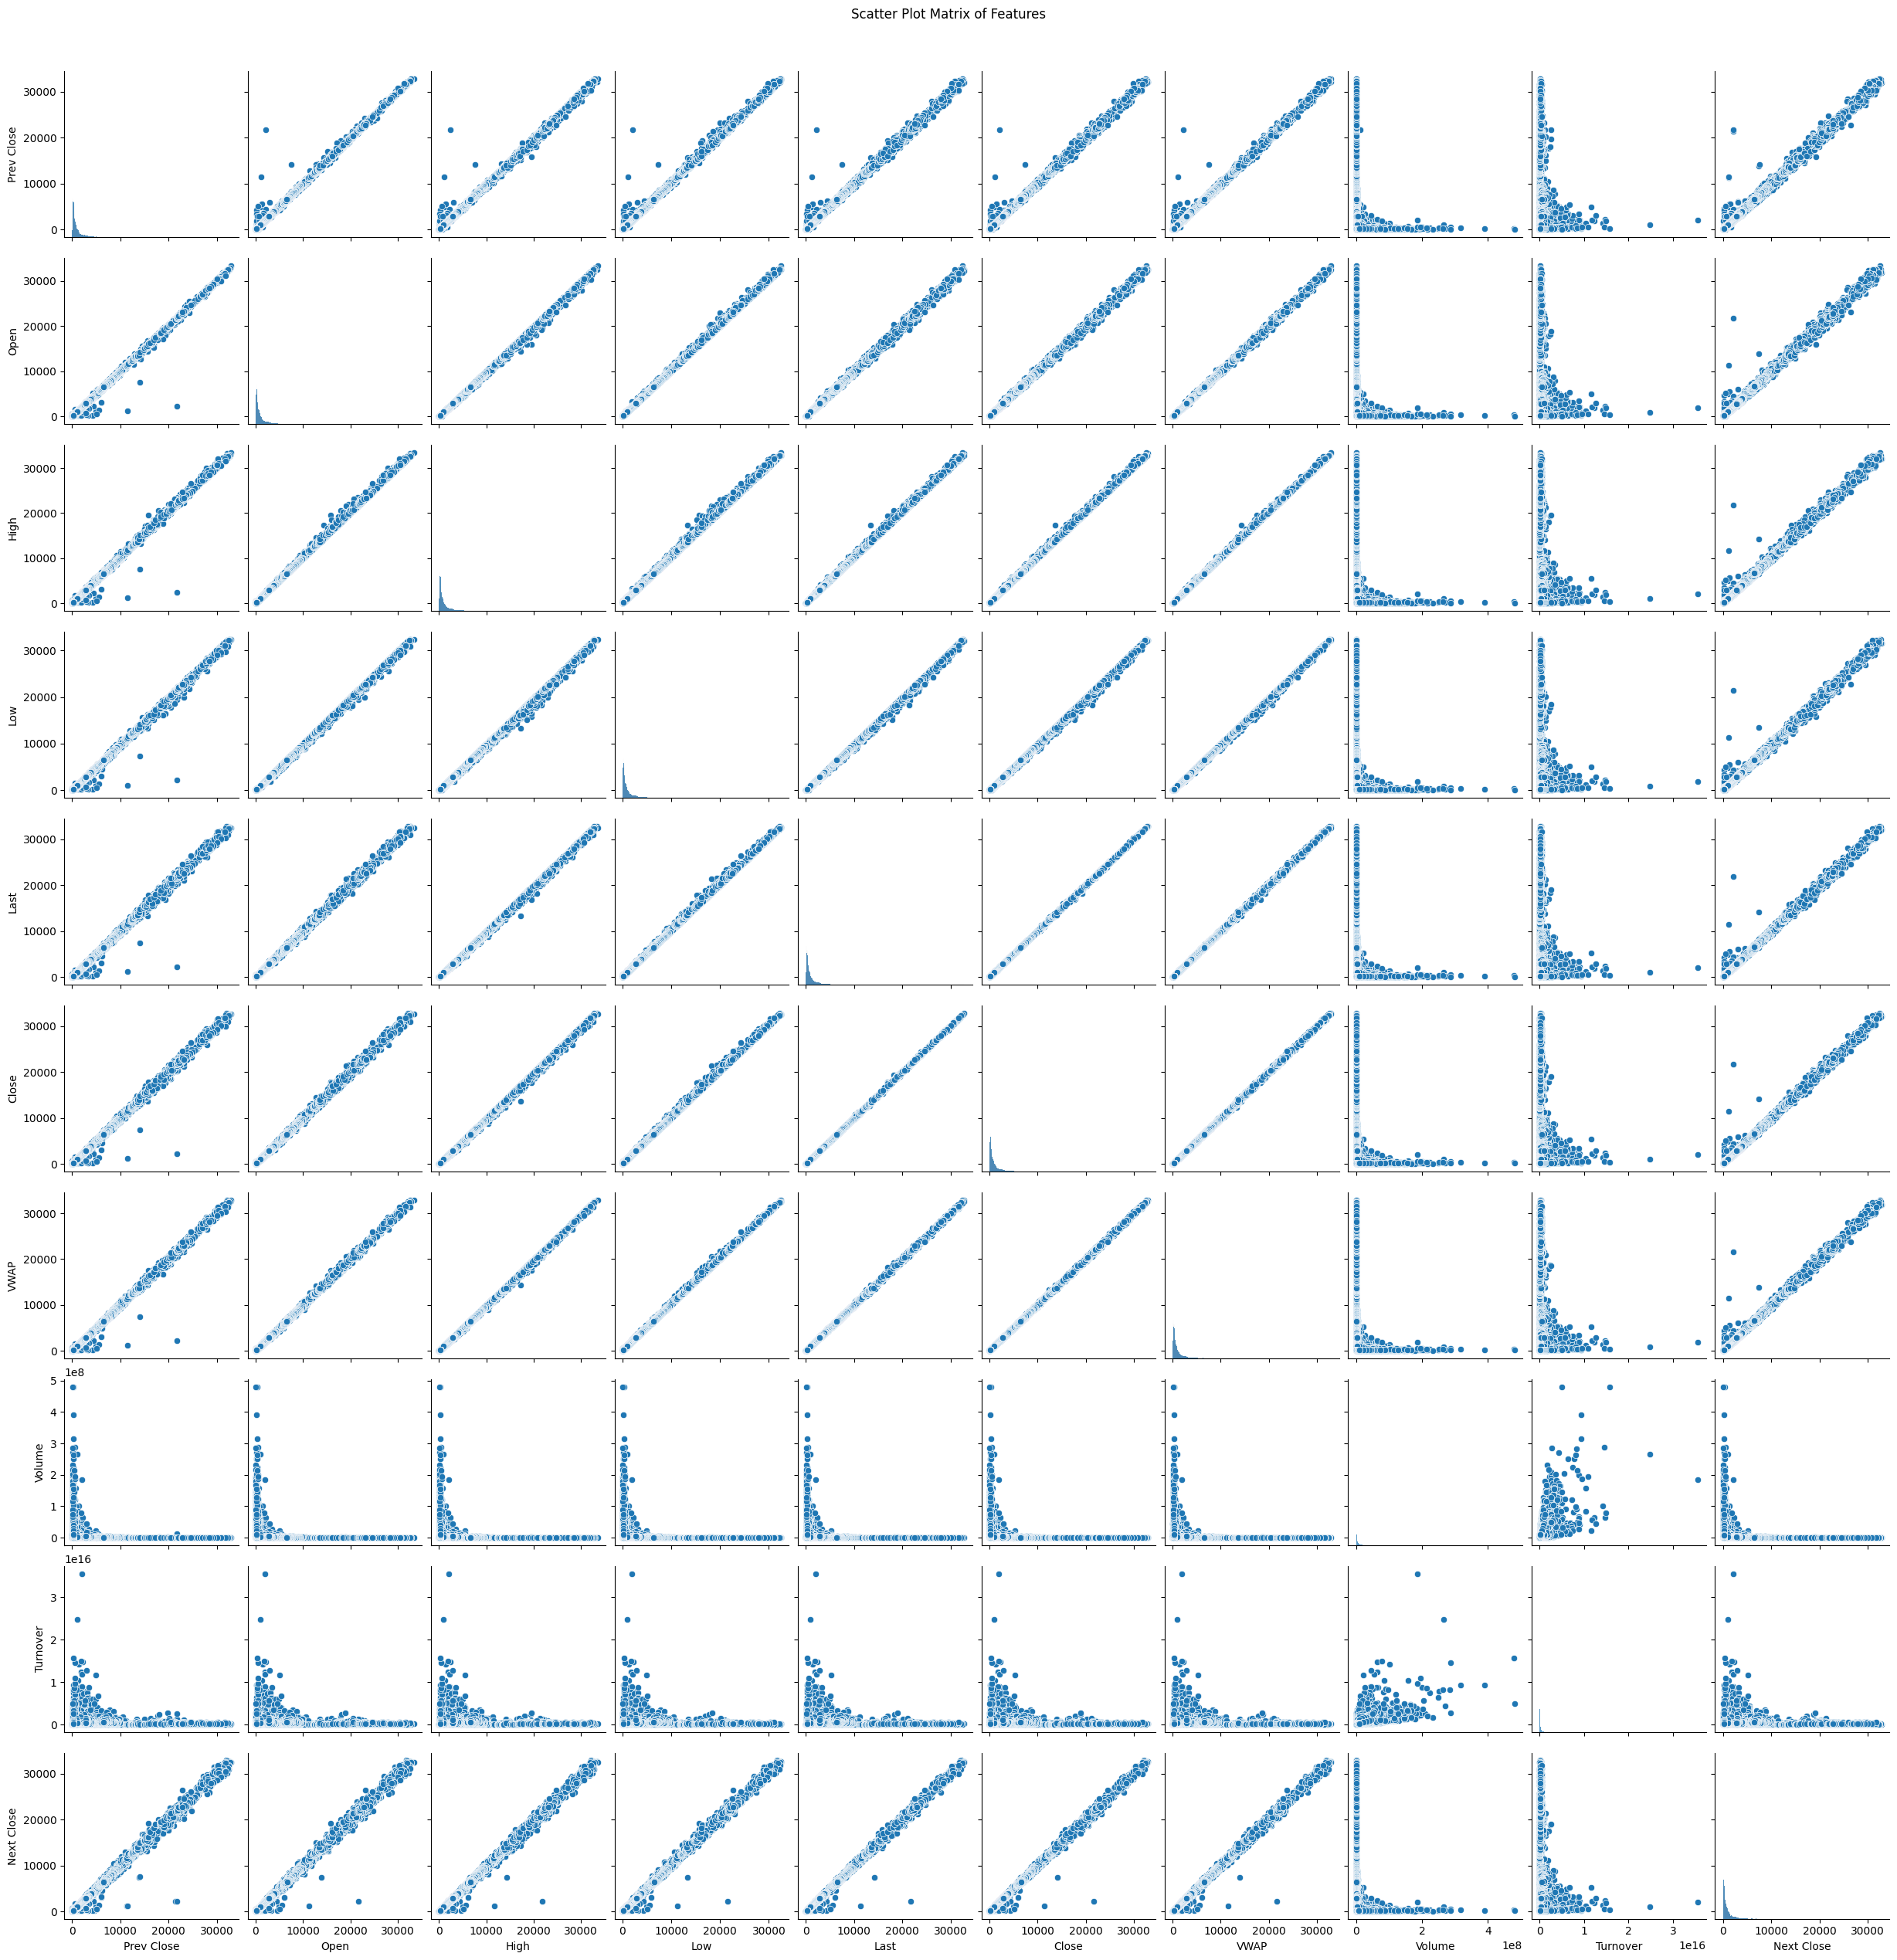

In [ ]:
numeric_df = raw_full_df.select_dtypes(include=['float64', 'int64'])

# Create a scatter plot matrix (pairplot)
sns.pairplot(numeric_df)
print(numeric_df.shape)
# Show the plot
plt.suptitle('Scatter Plot Matrix of Features', y=1.02)  # Optional: Adjust title position
plt.show()

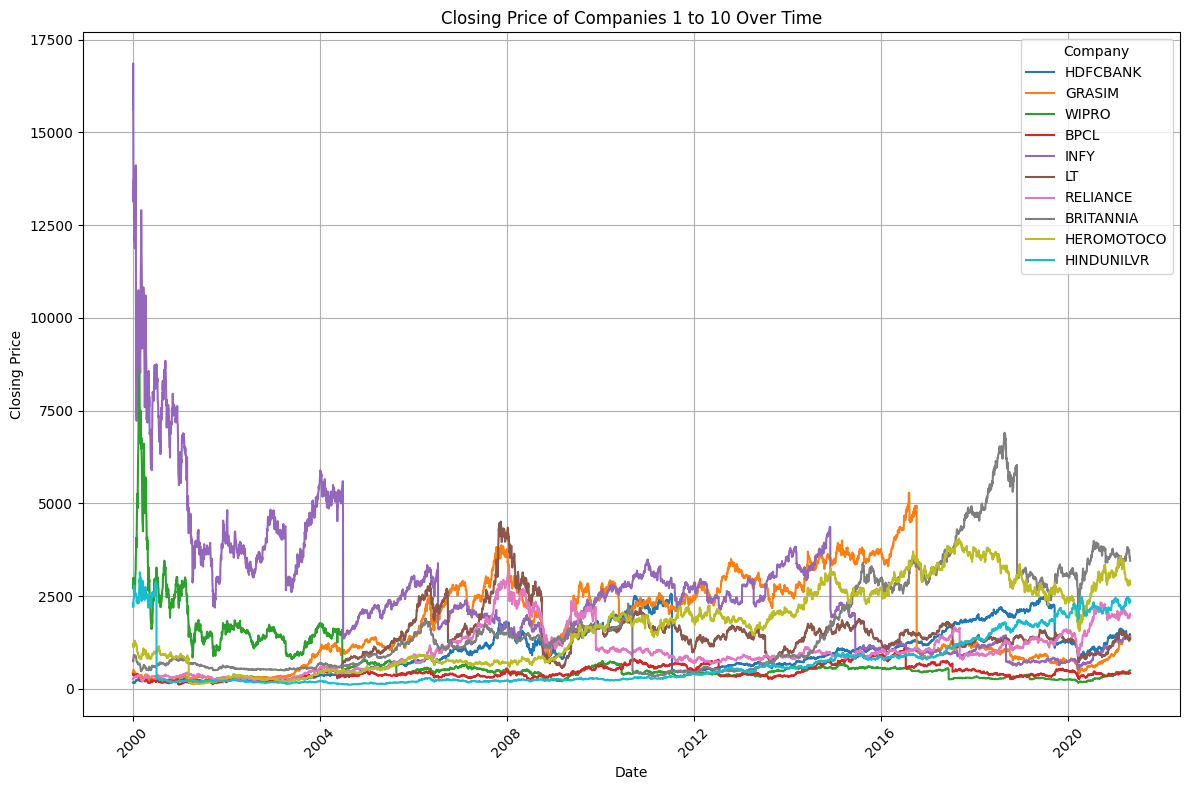

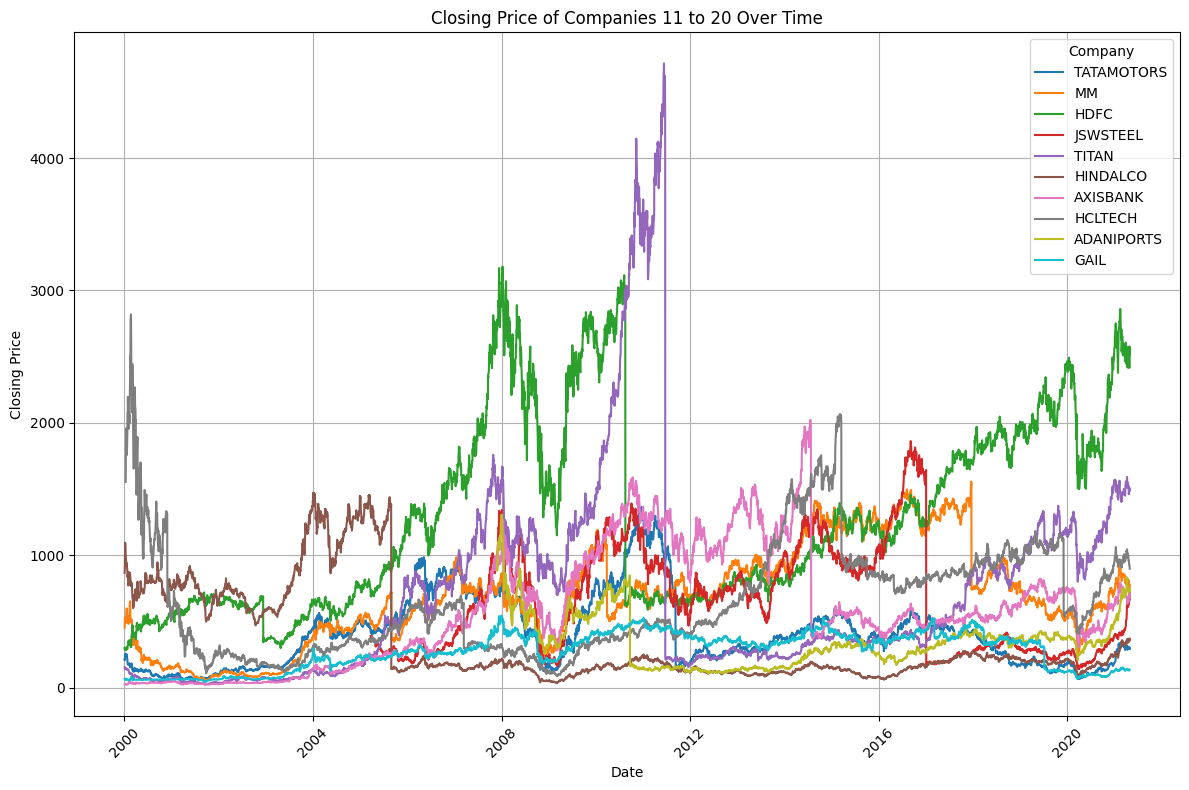

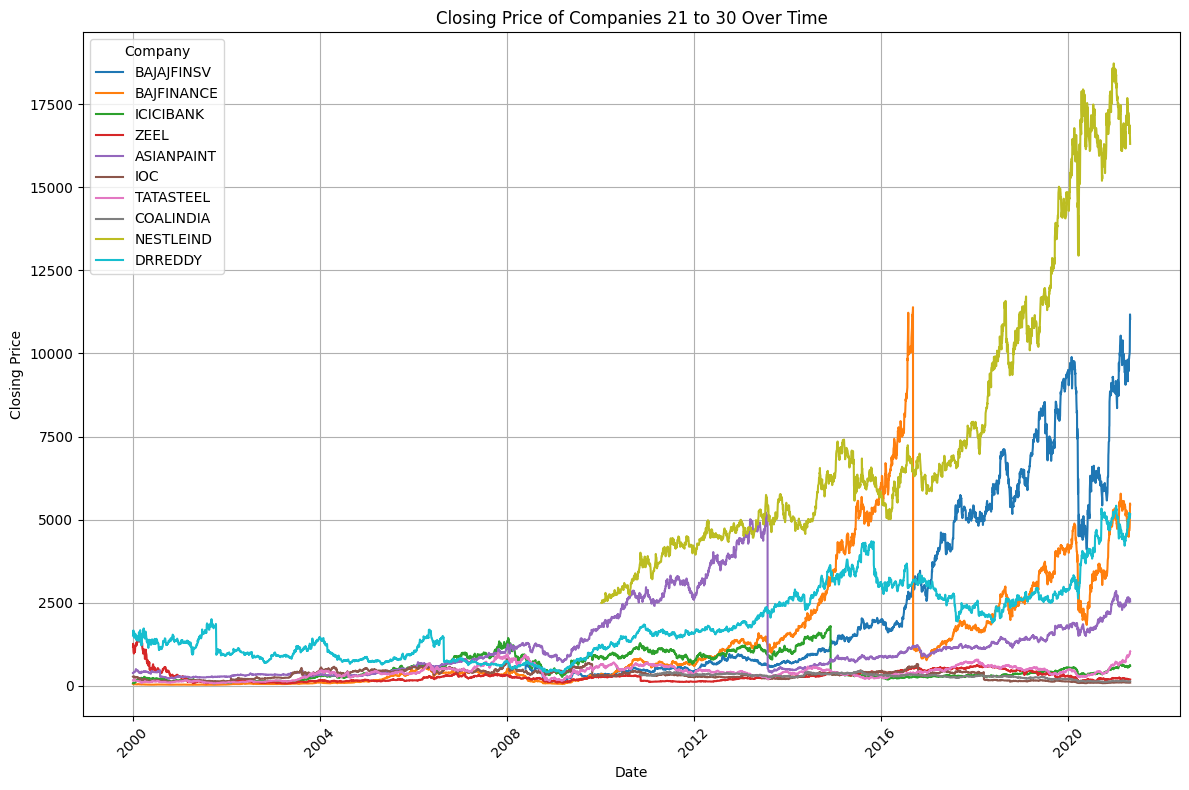

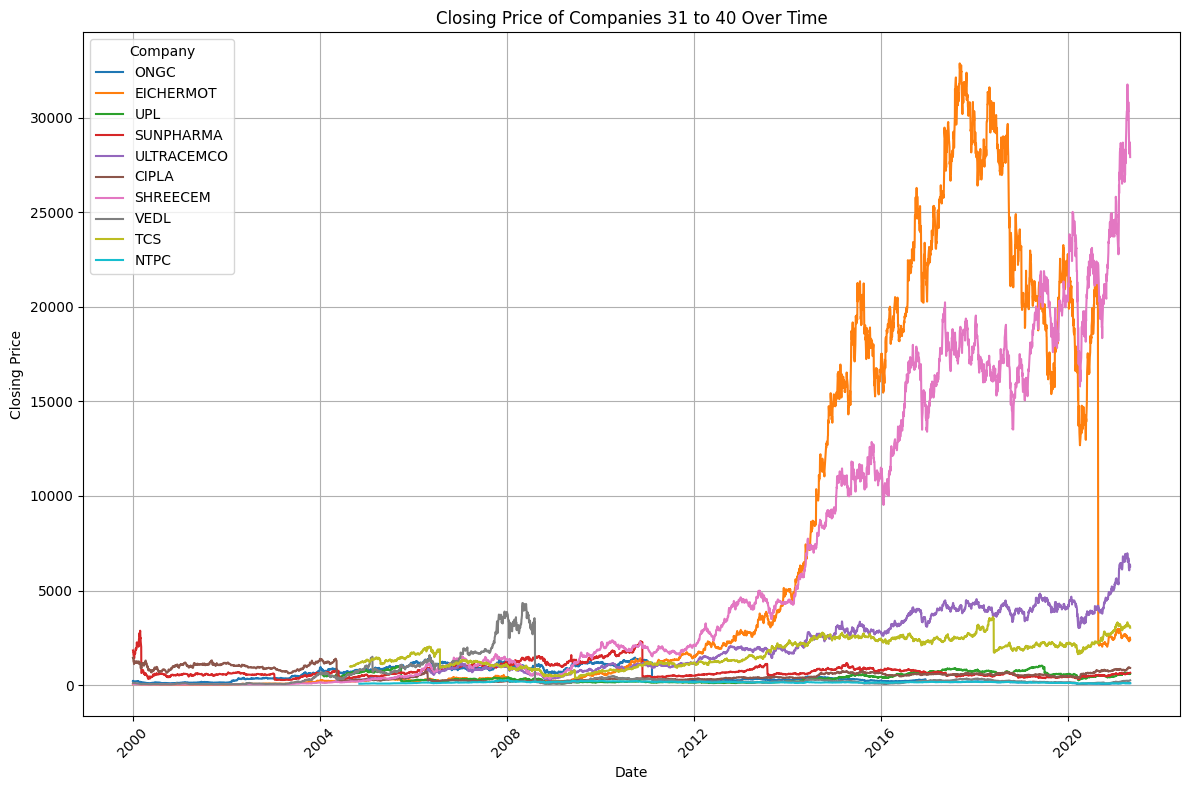

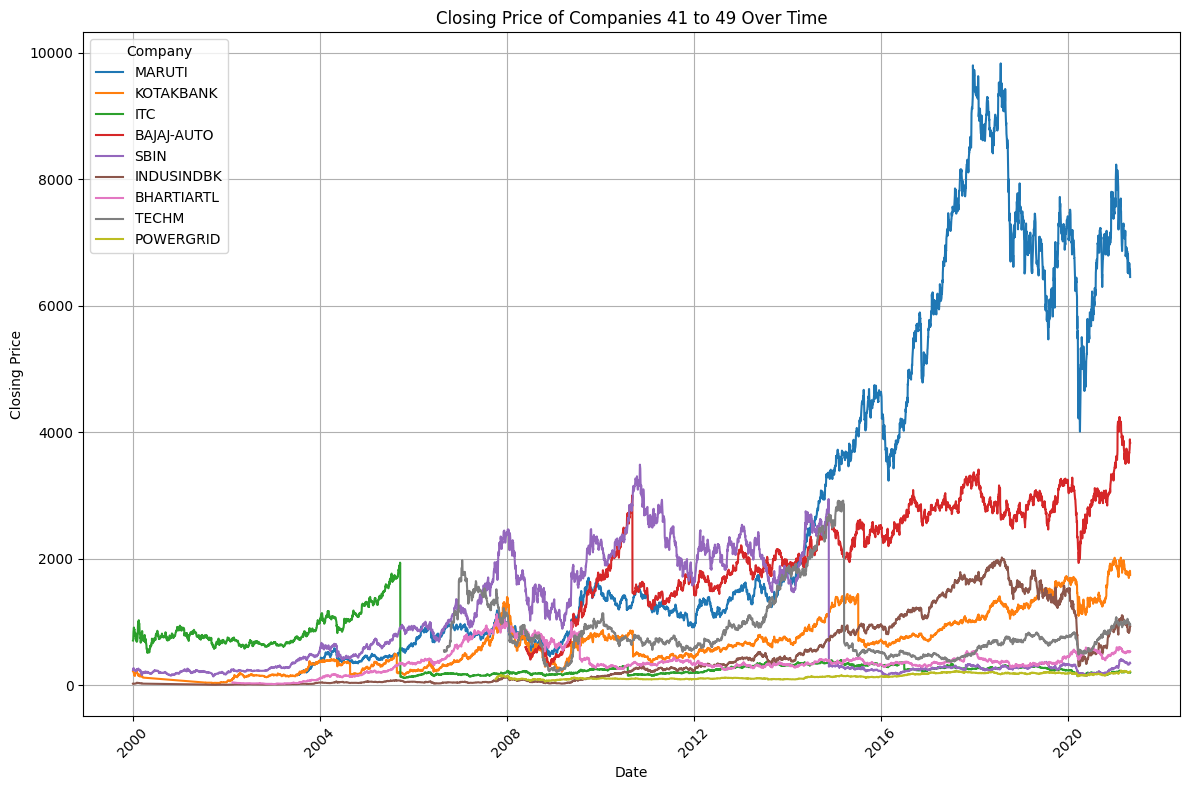

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming raw_full_df is your DataFrame

# Ensure the 'Date' column is in datetime format
raw_full_df['Date'] = pd.to_datetime(raw_full_df['Date'])

# Get the unique companies in the dataset
unique_companies = raw_full_df['Company'].unique()

# Number of companies per plot
companies_per_plot = 10

# Loop through unique companies in sets of 10
for i in range(0, len(unique_companies), companies_per_plot):
    # Select the next 10 companies
    companies_batch = unique_companies[i:i + companies_per_plot]

    # Create a plot for this set of 10 companies
    plt.figure(figsize=(12, 8))  # Adjust the size of the plot

    # Loop through each of the selected companies and plot the closing price over time
    for company in companies_batch:
        company_data = raw_full_df[raw_full_df['Company'] == company]
        plt.plot(company_data['Date'], company_data['Close'], label=company)

    # Add labels and a legend
    plt.title(f'Closing Price of Companies {i + 1} to {min(i + companies_per_plot, len(unique_companies))} Over Time')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend(title='Company')
    plt.grid(True)
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
# duplicates = raw_full_df[:100].T.duplicated()  # Transpose and find duplicate rows (features)
# print(raw_full_df.columns[duplicates])

Index([], dtype='object')


In [ ]:
# Check for duplicate rows
duplicates = raw_full_df.drop(columns=["Company", "Next Close"])[raw_full_df.duplicated()]

# Count the number of duplicate rows
num_duplicates = raw_full_df.duplicated().sum()

# Show the duplicated rows
print(duplicates)

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")


Empty DataFrame
Columns: [Date, Prev Close, Open, High, Low, Last, Close, VWAP, Volume, Turnover]
Index: []
Number of duplicate rows: 0


## **Transformations**

In [ ]:
raw_full_df.dropna(inplace=True)

In [ ]:
raw_full_df

Date    Company  Prev Close    Open    High     Low    Last  \
0       2000-01-03   HDFCBANK      157.40  166.00  170.00  166.00  170.00   
1       2000-01-04   HDFCBANK      170.00  182.00  183.45  171.00  174.00   
2       2000-01-05   HDFCBANK      173.80  170.00  173.90  165.00  168.00   
3       2000-01-06   HDFCBANK      166.95  168.00  170.00  165.30  168.95   
4       2000-01-07   HDFCBANK      168.30  162.15  171.00  162.15  170.75   
...            ...        ...         ...     ...     ...     ...     ...   
470378  2021-04-23  POWERGRID      203.45  204.30  212.90  204.00  210.90   
470379  2021-04-26  POWERGRID      211.15  208.20  216.45  208.20  215.75   
470380  2021-04-27  POWERGRID      215.80  216.05  220.50  215.80  216.40   
470381  2021-04-28  POWERGRID      216.65  218.80  221.70  216.30  221.35   
470382  2021-04-29  POWERGRID      220.90  223.10  223.65  219.05  219.80   

         Close    VWAP    Volume      Turnover  Next Close  
0       170.00  169.52     33259  5.638122e+11      173.80  
1       173.80  174.99    168710  2.952261e+12      166.95  
2       166.95  169.20    159820  2.704094e+12      168.30  
3       168.30  168.44     85026  1.432166e+12      168.35  
4       168.35  166.79     85144  1.420158e+12      165.90  
...        ...     ...       ...           ...         ...  
470378  211.15  211.30  21553903  4.554345e+14      215.80  
470379  215.80  213.23  10765892  2.295642e+14      216.65  
470380  216.65  217.89   8589721  1.871605e+14      220.90  
470381  220.90  219.20   9215766  2.020103e+14      220.15  
470382  220.15  220.60   8303610  1.831748e+14      220.05  

[235143 rows x 12 columns]

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = raw_full_df['Next Close'].quantile(0.25)
Q3 = raw_full_df['Next Close'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = raw_full_df[(raw_full_df['Next Close'] >= lower_bound) & (raw_full_df['Next Close'] <= upper_bound)]

In [ ]:
lower_bound, upper_bound

(np.float64(-1177.8125), np.float64(2694.6875))

In [ ]:
df_no_outliers

Date    Company  Prev Close    Open    High     Low    Last  \
0       2000-01-03   HDFCBANK      157.40  166.00  170.00  166.00  170.00   
1       2000-01-04   HDFCBANK      170.00  182.00  183.45  171.00  174.00   
2       2000-01-05   HDFCBANK      173.80  170.00  173.90  165.00  168.00   
3       2000-01-06   HDFCBANK      166.95  168.00  170.00  165.30  168.95   
4       2000-01-07   HDFCBANK      168.30  162.15  171.00  162.15  170.75   
...            ...        ...         ...     ...     ...     ...     ...   
470378  2021-04-23  POWERGRID      203.45  204.30  212.90  204.00  210.90   
470379  2021-04-26  POWERGRID      211.15  208.20  216.45  208.20  215.75   
470380  2021-04-27  POWERGRID      215.80  216.05  220.50  215.80  216.40   
470381  2021-04-28  POWERGRID      216.65  218.80  221.70  216.30  221.35   
470382  2021-04-29  POWERGRID      220.90  223.10  223.65  219.05  219.80   

         Close    VWAP    Volume      Turnover  Next Close  
0       170.00  169.52     33259  5.638122e+11      173.80  
1       173.80  174.99    168710  2.952261e+12      166.95  
2       166.95  169.20    159820  2.704094e+12      168.30  
3       168.30  168.44     85026  1.432166e+12      168.35  
4       168.35  166.79     85144  1.420158e+12      165.90  
...        ...     ...       ...           ...         ...  
470378  211.15  211.30  21553903  4.554345e+14      215.80  
470379  215.80  213.23  10765892  2.295642e+14      216.65  
470380  216.65  217.89   8589721  1.871605e+14      220.90  
470381  220.90  219.20   9215766  2.020103e+14      220.15  
470382  220.15  220.60   8303610  1.831748e+14      220.05  

[212635 rows x 12 columns]

In [ ]:
df_no_outliers["Last"].describe()

count    212635.000000
mean        698.606782
std         606.634816
min           9.100000
25%         253.750000
50%         490.450000
75%         966.300000
max       21780.000000
Name: Last, dtype: float64

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df["Date"] = pd.to_datetime(df["Date"])
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.isocalendar().week

    df['Group'] = ((df['year'] - 2010) * 48 + df['month'] * 4 + df['dayofmonth'] // 7).astype("float32")

    # Cyclic Features
    # Day of the week (0=Monday, 6=Sunday)
    df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7).astype("float32")
    df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7).astype("float32")

    # Month of the year (1=January, 12=December)
    df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12).astype("float32")
    df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12).astype("float32")

    # Cyclic encoding of Year (if this feature makes sense for your data)
    df['year_sin'] = np.sin(2 * np.pi * df['year'] / (df['year'].max() - df['year'].min())).astype("float32")
    df['year_cos'] = np.cos(2 * np.pi * df['year'] / (df['year'].max() - df['year'].min())).astype("float32")



    df['Season'] = df['month'].apply(lambda x:
                                      'Winter' if x in [12, 1, 2] else
                                      'Spring' if x in [3, 4, 5] else
                                      'Summer' if x in [6, 7, 8] else
                                      'Autumn')

    df['is_monday'] = df['dayofweek'].isin([0]).astype(int)
    df['is_friday'] = df['dayofweek'].isin([4]).astype(int)
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
    df['is_month_start'] = df['Date'].dt.is_month_start.astype(int)
    df['is_month_end'] = df['Date'].dt.is_month_end.astype(int)
    return df

In [ ]:
new_features = create_features(df_no_outliers)

In [ ]:
def create_features_more(df):
  df["Today_difference"] = df["Close"] - df["Open"]
  df["day_difference"] = df["Close"] - df["Prev Close"]
  df["night_difference"] = df["Open"] - df["Prev Close"]
  df["day_range"] = df["High"] - df["Low"]
  return df

In [ ]:
new_features = create_features_more(new_features)

In [ ]:
def get_historical_data(df):
    df['2_days_ago_price'] = df.groupby('Company')['Close'].shift(2)
    df['3_days_ago_price'] = df.groupby('Company')['Close'].shift(3)
    df['5_days_ago_price'] = df.groupby('Company')['Close'].shift(5)
    df['1_week_ago_price'] = df.groupby('Company')['Close'].shift(7)
    df['2_week_ago_price'] = df.groupby('Company')['Close'].shift(14)
    df['3_week_ago_price'] = df.groupby('Company')['Close'].shift(21)
    df['30_days_ago_price'] = df.groupby('Company')['Close'].shift(30)
    df['60_days_ago_price'] = df.groupby('Company')['Close'].shift(60)
    df['120_days_ago_price'] = df.groupby('Company')['Close'].shift(120)
    return df

In [ ]:
new_features = get_historical_data(new_features)
new_features['2_days_ago_price'] = new_features['2_days_ago_price'].fillna(new_features['Prev Close'])
new_features['3_days_ago_price'] = new_features['3_days_ago_price'].fillna(new_features['Prev Close'])
new_features['5_days_ago_price'] = new_features['5_days_ago_price'].fillna(new_features['Prev Close'])
new_features['1_week_ago_price'] = new_features['1_week_ago_price'].fillna(new_features['Prev Close'])
new_features['2_week_ago_price'] = new_features['2_week_ago_price'].fillna(new_features['Prev Close'])
new_features['3_week_ago_price'] = new_features['3_week_ago_price'].fillna(new_features['Prev Close'])
new_features['30_days_ago_price'] = new_features['30_days_ago_price'].fillna(new_features['Prev Close'])
new_features['60_days_ago_price'] = new_features['60_days_ago_price'].fillna(new_features['Prev Close'])
new_features['120_days_ago_price'] = new_features['120_days_ago_price'].fillna(new_features['Prev Close'])


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
new_features

Date    Company  Prev Close    Open    High     Low    Last  \
0      2000-01-03   HDFCBANK      157.40  166.00  170.00  166.00  170.00   
1      2000-01-04   HDFCBANK      170.00  182.00  183.45  171.00  174.00   
2      2000-01-05   HDFCBANK      173.80  170.00  173.90  165.00  168.00   
3      2000-01-06   HDFCBANK      166.95  168.00  170.00  165.30  168.95   
4      2000-01-07   HDFCBANK      168.30  162.15  171.00  162.15  170.75   
...           ...        ...         ...     ...     ...     ...     ...   
470378 2021-04-23  POWERGRID      203.45  204.30  212.90  204.00  210.90   
470379 2021-04-26  POWERGRID      211.15  208.20  216.45  208.20  215.75   
470380 2021-04-27  POWERGRID      215.80  216.05  220.50  215.80  216.40   
470381 2021-04-28  POWERGRID      216.65  218.80  221.70  216.30  221.35   
470382 2021-04-29  POWERGRID      220.90  223.10  223.65  219.05  219.80   

         Close    VWAP    Volume      Turnover  Next Close  dayofweek  \
0       170.00  169.52     33259  5.638122e+11      173.80          0   
1       173.80  174.99    168710  2.952261e+12      166.95          1   
2       166.95  169.20    159820  2.704094e+12      168.30          2   
3       168.30  168.44     85026  1.432166e+12      168.35          3   
4       168.35  166.79     85144  1.420158e+12      165.90          4   
...        ...     ...       ...           ...         ...        ...   
470378  211.15  211.30  21553903  4.554345e+14      215.80          4   
470379  215.80  213.23  10765892  2.295642e+14      216.65          0   
470380  216.65  217.89   8589721  1.871605e+14      220.90          1   
470381  220.90  219.20   9215766  2.020103e+14      220.15          2   
470382  220.15  220.60   8303610  1.831748e+14      220.05          3   

        quarter  month  year  dayofyear  dayofmonth  weekofyear  Group  \
0             1      1  2000          3           3           1 -476.0   
1             1      1  2000          4           4           1 -476.0   
2             1      1  2000          5           5           1 -476.0   
3             1      1  2000          6           6           1 -476.0   
4             1      1  2000          7           7           1 -475.0   
...         ...    ...   ...        ...         ...         ...    ...   
470378        2      4  2021        113          23          16  547.0   
470379        2      4  2021        116          26          17  547.0   
470380        2      4  2021        117          27          17  547.0   
470381        2      4  2021        118          28          17  548.0   
470382        2      4  2021        119          29          17  548.0   

        dayofweek_sin  dayofweek_cos  month_sin  month_cos  year_sin  \
0            0.000000       1.000000   0.500000   0.866025  0.997204   
1            0.781832       0.623490   0.500000   0.866025  0.997204   
2            0.974928      -0.222521   0.500000   0.866025  0.997204   
3            0.433884      -0.900969   0.500000   0.866025  0.997204   
4           -0.433884      -0.900969   0.500000   0.866025  0.997204   
...               ...            ...        ...        ...       ...   
470378      -0.433884      -0.900969   0.866025  -0.500000  0.997204   
470379       0.000000       1.000000   0.866025  -0.500000  0.997204   
470380       0.781832       0.623490   0.866025  -0.500000  0.997204   
470381       0.974928      -0.222521   0.866025  -0.500000  0.997204   
470382       0.433884      -0.900969   0.866025  -0.500000  0.997204   

        year_cos  Season  is_monday  is_friday  is_weekend  is_month_start  \
0        0.07473  Winter          1          0           0               0   
1        0.07473  Winter          0          0           0               0   
2        0.07473  Winter          0          0           0               0   
3        0.07473  Winter          0          0           0               0   
4        0.07473  Winter          0          1           0               0   
.

In [ ]:
new_features.columns

Index(['Date', 'Company', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close',
       'VWAP', 'Volume', 'Turnover', 'Next Close', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'Group',
       'dayofweek_sin', 'dayofweek_cos', 'month_sin', 'month_cos', 'year_sin',
       'year_cos', 'Season', 'is_monday', 'is_friday', 'is_weekend',
       'is_month_start', 'is_month_end', 'Today_difference', 'day_difference',
       'night_difference', 'day_range', '2_days_ago_price', '3_days_ago_price',
       '5_days_ago_price', '1_week_ago_price', '2_week_ago_price',
       '3_week_ago_price', '30_days_ago_price', '60_days_ago_price',
       '120_days_ago_price'],
      dtype='object')

In [ ]:
numeric_cols = ['Prev Close', 'Open', 'High', 'Low', 'Last', 'Close',
       'VWAP', 'Volume', 'Turnover', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'Group',
       'dayofweek_sin', 'dayofweek_cos', 'month_sin', 'month_cos', 'year_sin',
       'year_cos', 'is_weekend', 'is_month_start', 'is_month_end',
       'is_monday', 'is_friday',
                'Today_difference', 'day_difference',
       'night_difference', 'day_range', '2_days_ago_price', '3_days_ago_price',
       '5_days_ago_price', '1_week_ago_price', '2_week_ago_price',
       '3_week_ago_price', '30_days_ago_price', '60_days_ago_price', "120_days_ago_price"]

categorical_cols = ['Company', 'Season']
target_col = 'Next Close'

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler

In [ ]:
le = LabelEncoder()
for col in categorical_cols:
    new_features[col] = le.fit_transform(new_features[col])

In [ ]:
scaler = StandardScaler()
new_features[numeric_cols] = scaler.fit_transform(new_features[numeric_cols])

In [ ]:
X_train = new_features[new_features["Date"] <= "2016-12-31"].drop(columns=["Date", "Next Close"])
X_test = new_features[new_features["Date"] > "2016-12-31"].drop(columns=["Date", "Next Close"])
y_train = new_features[new_features["Date"] <= "2016-12-31"]["Next Close"]
y_test = new_features[new_features["Date"] > "2016-12-31"]["Next Close"]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170477, 43), (42158, 43), (170477,), (42158,))

In [ ]:
from sklearn.metrics import mean_squared_error
def rmse(a,b):
    return np.sqrt(mean_squared_error(a,b))

In [ ]:
new_features["Last"].describe()

count    2.126350e+05
mean     4.277258e-18
std      1.000002e+00
min     -1.136612e+00
25%     -7.333206e-01
50%     -3.431344e-01
75%      4.412768e-01
max      3.475146e+01
Name: Last, dtype: float64

In [ ]:
new_features["Next Close"].describe()

count    212635.000000
mean        698.481953
std         603.996548
min           9.150000
25%         253.650000
50%         490.650000
75%         966.500000
max        2694.650000
Name: Next Close, dtype: float64

<Axes: xlabel='Next Close', ylabel='Density'>

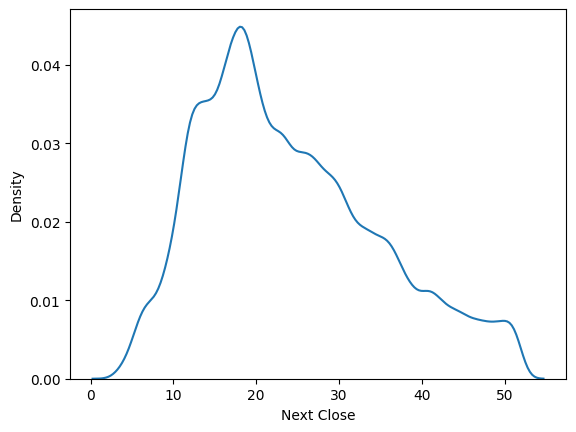

In [ ]:
sns.kdeplot(np.power(new_features["Next Close"], 0.5))

<Axes: xlabel='Next Close', ylabel='Density'>

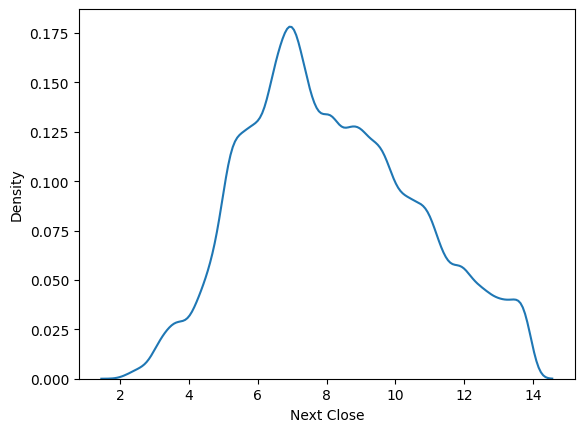

In [ ]:
sns.kdeplot(np.power(new_features["Next Close"], 1/3))

<Axes: xlabel='Next Close', ylabel='Density'>

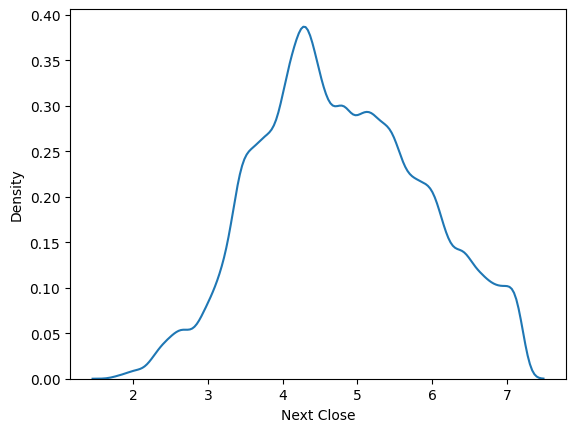

In [ ]:
sns.kdeplot(np.power(new_features["Next Close"], 1/4))

<Axes: xlabel='Next Close', ylabel='Density'>

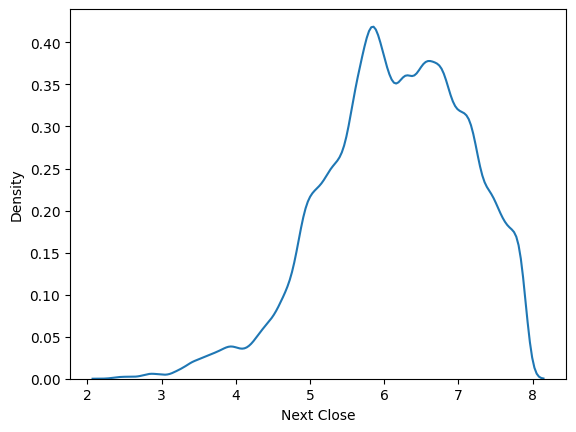

In [ ]:
sns.kdeplot(np.log1p(new_features["Next Close"]))

In [ ]:
# y_train = np.log1p(y_train)
# y_test = np.log1p(y_test)

In [ ]:
def rmse_with_exponent(a,b, p=None):
  if p==None:
    print("None reached")
    actual_values = np.expm1(a)
    predicted_values = np.expm1(b)
    return np.sqrt(mean_squared_error(actual_values, predicted_values))
  actual_values = np.power(a, p)
  predicted_values = np.power(b, p)
  return np.sqrt(mean_squared_error(actual_values, predicted_values))

In [ ]:
y_train.describe()

count    154652.000000
mean          0.190792
std           8.957876
min         -24.450000
25%          -4.300000
50%           0.050000
75%           4.600000
max          25.150000
Name: Next Close, dtype: float64

In [ ]:
y_test

4235      10.596688
4236      10.583611
4237      10.585693
4238      10.607808
4239      10.612398
            ...    
470378     5.998148
470379     6.006012
470380     6.045032
470381     6.038182
470382     6.037268
Name: Next Close, Length: 42158, dtype: float64

In [ ]:
y_train

0         5.580630
1         5.506329
2         5.521131
3         5.521678
4         5.494761
            ...   
469308    5.657174
469309    5.646216
469310    5.646739
469311    5.682577
469312    5.684125
Name: Next Close, Length: 170477, dtype: float64

In [ ]:
X_test

Company  Prev Close      Open      High       Low      Last     Close  \
4235         17   -0.023141 -0.022455 -0.029098 -0.021669 -0.026376 -0.026800   
4236         17   -0.026667 -0.025802 -0.032209 -0.024144 -0.029495 -0.029590   
4237         17   -0.029457 -0.030038 -0.036009 -0.024910 -0.029960 -0.031294   
4238         17   -0.031162 -0.030367 -0.035054 -0.025185 -0.031433 -0.031023   
4239         17   -0.030891 -0.029942 -0.033565 -0.023181 -0.027751 -0.028137   
...         ...         ...       ...       ...       ...       ...       ...   
470378       34   -0.411706 -0.411363 -0.409862 -0.409760 -0.408888 -0.408737   
470379       34   -0.408723 -0.409854 -0.408506 -0.408111 -0.407009 -0.406936   
470380       34   -0.406921 -0.406816 -0.406960 -0.405125 -0.406757 -0.406606   
470381       34   -0.406591 -0.405752 -0.406502 -0.404929 -0.404839 -0.404960   
470382       34   -0.404945 -0.404089 -0.405757 -0.403849 -0.405439 -0.405250   

            VWAP    Volume  Turnover  dayofweek   quarter     month      year  \
4235   -0.026638 -0.288769 -0.151101  -1.410345 -1.329155 -1.579596  1.027978   
4236   -0.028799 -0.284033 -0.140111  -0.708102 -1.329155 -1.579596  1.027978   
4237   -0.030596 -0.177633  0.139648  -0.005859 -1.329155 -1.579596  1.027978   
4238   -0.030956 -0.184138  0.121983   0.696383 -1.329155 -1.579596  1.027978   
4239   -0.028609 -0.226810  0.011871   1.398626 -1.329155 -1.579596  1.027978   
...          ...       ...       ...        ...       ...       ...       ...   
470378 -0.408815  2.525280  0.893808   1.398626 -0.435344 -0.711868  1.701119   
470379 -0.408067  1.053502  0.208424  -1.410345 -0.435344 -0.711868  1.701119   
470380 -0.406263  0.756613  0.079753  -0.708102 -0.435344 -0.711868  1.701119   
470381 -0.405755  0.842022  0.124814  -0.005859 -0.435344 -0.711868  1.701119   
470382 -0.405213  0.717579  0.067659   0.696383 -0.435344 -0.711868  1.701119   

        dayofyear  dayofmonth  weekofyear     Group  dayofweek_sin  \
4235    -1.696254   -1.570416   -1.676612  0.945661      -0.671998   
4236    -1.686795   -1.456490   -1.676612  0.945661       0.833463   
4237    -1.677336   -1.342563   -1.676612  0.945661       1.205281   
4238    -1.667877   -1.228637   -1.676612  0.945661       0.163470   
4239    -1.658418   -1.114711   -1.676612  0.945661      -1.507465   
...           ...         ...         ...       ...            ...   
470378  -0.646323    0.822035   -0.683747  1.671939      -1.507465   
470379  -0.617947    1.163814   -0.617556  1.671939      -0.671998   
470380  -0.608488    1.277740   -0.617556  1.671939       0.833463   
470381  -0.599029    1.391666   -0.617556  1.675448       1.205281   
470382  -0.589571    1.505593   -0.617556  1.675448       0.163470   

        dayofweek_cos  month_sin  month_cos  year_sin  year_cos  Season  \
4235         1.388307   0.705183   1.222735  0.473113  1.279967       3   
4236         0.903236   0.705183   1.222735  0.473113  1.279967       3   
4237        -0.186708   0.705183   1.222735  0.473113  1.279967       3   
4238        -1.060775   0.705183   1.222735  0.473113  1.279967       3   
4239        -1.060775   0.705183   1.222735  0.473113  1.279967       3   
...               ...        ...        ...       ...       ...     ...   
470378      -1.060775   1.224978  -0.701199  1.468967  0.032036       1   
470379       1.388307   1.224978  -0.701199  1.468967  0.032036       1   
470380       0.903236   1.224978  -0.701199  1.468967  0.032036       1   
470381      -0.186708   1.224978  -0.701199  1.468967  0.032036       1   
470382      -1.060775   1.224978  -0.701199  1.468967  0.032036       1   

        is_weekend  is_month_start  is_month_end  is_monday  is_friday  \
4235     -0.067864       -0.177943     -0.186269   2.006337  -0.494268   
4236     -0.067864       -0.177943     -0.186269  -0.498421  -0.494268   
4237     -0.067864       -0.177943     -0.186269  -0.498421  -0.494268   
4238     -0.067864      

In [ ]:
X_train

Company  Prev Close      Open      High       Low      Last     Close  \
0            17   -0.429551 -0.426181 -0.426243 -0.424686 -0.424736 -0.424677   
1            17   -0.424668 -0.419991 -0.421107 -0.422722 -0.423186 -0.423205   
2            17   -0.423196 -0.424634 -0.424753 -0.425079 -0.425511 -0.425859   
3            17   -0.425850 -0.425408 -0.426243 -0.424961 -0.425143 -0.425336   
4            17   -0.425327 -0.427671 -0.425861 -0.426198 -0.424446 -0.425317   
...         ...         ...       ...       ...       ...       ...       ...   
469308       34   -0.419902 -0.419855 -0.421527 -0.419875 -0.421423 -0.421269   
469309       34   -0.421258 -0.421268 -0.421775 -0.420542 -0.420551 -0.420397   
469310       34   -0.420386 -0.420358 -0.421279 -0.419541 -0.421113 -0.420804   
469311       34   -0.420793 -0.421074 -0.421871 -0.419580 -0.420900 -0.420784   
469312       34   -0.420774 -0.420610 -0.420477 -0.419089 -0.419505 -0.419448   

            VWAP    Volume  Turnover  dayofweek   quarter     month      year  \
0      -0.424996 -0.410722 -0.486458  -1.410345 -1.329155 -1.579596 -1.832872   
1      -0.422878 -0.392242 -0.479211  -0.708102 -1.329155 -1.579596 -1.832872   
2      -0.425120 -0.393455 -0.479964  -0.005859 -1.329155 -1.579596 -1.832872   
3      -0.425414 -0.403659 -0.483823   0.696383 -1.329155 -1.579596 -1.832872   
4      -0.426053 -0.403643 -0.483860   1.398626 -1.329155 -1.579596 -1.832872   
...          ...       ...       ...        ...       ...       ...       ...   
469308 -0.421100  0.040037 -0.306310  -1.410345  1.352277  1.602073  0.859693   
469309 -0.421131 -0.065630 -0.348580  -0.708102  1.352277  1.602073  0.859693   
469310 -0.420380 -0.128252 -0.372344  -0.005859  1.352277  1.602073  0.859693   
469311 -0.420906  0.715682 -0.035187   0.696383  1.352277  1.602073  0.859693   
469312 -0.419686 -0.041334 -0.335781   1.398626  1.352277  1.602073  0.859693   

        dayofyear  dayofmonth  weekofyear     Group  dayofweek_sin  \
0       -1.686795   -1.456490   -1.676612 -1.917350      -0.671998   
1       -1.677336   -1.342563   -1.676612 -1.917350       0.833463   
2       -1.667877   -1.228637   -1.676612 -1.917350       1.205281   
3       -1.658418   -1.114711   -1.676612 -1.917350       0.163470   
4       -1.648959   -1.000785   -1.676612 -1.913842      -1.507465   
...           ...         ...         ...       ...            ...   
469308   1.699466    1.163814    1.699127  0.942152      -0.671998   
469309   1.708925    1.277740    1.699127  0.942152       0.833463   
469310   1.718384    1.391666    1.699127  0.945661       1.205281   
469311   1.727843    1.505593    1.699127  0.945661       0.163470   
469312   1.737301    1.619519    1.699127  0.945661      -1.507465   

        dayofweek_cos  month_sin  month_cos  year_sin  year_cos  Season  \
0            1.388307   0.705183   1.222735  1.468967  0.032036       3   
1            0.903236   0.705183   1.222735  1.468967  0.032036       3   
2           -0.186708   0.705183   1.222735  1.468967  0.032036       3   
3           -1.060775   0.705183   1.222735  1.468967  0.032036       3   
4           -1.060775   0.705183   1.222735  1.468967  0.032036       3   
...               ...        ...        ...       ...       ...     ...   
469308       1.388307  -0.004869   1.411427  0.055242  1.342909       3   
469309       0.903236  -0.004869   1.411427  0.055242  1.342909       3   
469310      -0.186708  -0.004869   1.411427  0.055242  1.342909       3   
469311      -1.060775  -0.004869   1.411427  0.055242  1.342909       3   
469312      -1.060775  -0.004869   1.411427  0.055242  1.342909       3   

        is_weekend  is_month_start  is_month_end  is_monday  is_friday  \
0        -0.067864       -0.177943     -0.186269   2.006337  -0.494268   
1        -0.067864       -0.177943     -0.186269  -0.498421  -0.494268   
2        -0.067864       -0.177943     -0.186269  -0.498421  -0.494268   
3        -0.067864      

## **ML**

In [ ]:
def replace_neg_values(y):
  for i in range(len(y)):
    if y[i] < 0:
      y[i] = 0
  return y

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred = replace_neg_values(model_lr.predict(X_test))
y_pred_2 = replace_neg_values(model_lr.predict(X_train))
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

RMSE for test: 73.66606572316195  RMSE for train: 40.339922751080145



In [ ]:
y_pred

array([1193.18255693, 1190.79932785, 1187.7497819 , ...,  216.1572752 ,
        221.02805337,  220.54746498])

In [ ]:
pd.DataFrame(y_pred).describe()

0
count  42158.000000
mean     775.583176
std      657.449675
min        0.000000
25%      277.864688
50%      522.821609
75%     1133.259542
max    15438.369273

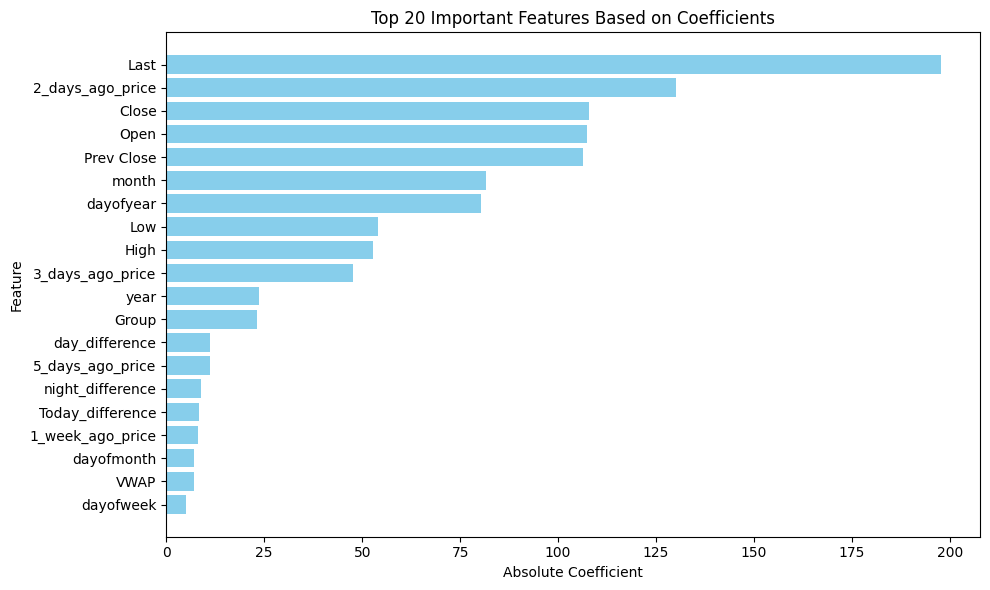

In [ ]:
coefficients = model_lr.coef_

# Create a DataFrame for feature importance (with feature names if available)
# Assuming you have feature names in X_train (columns)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # If X_train is a DataFrame, otherwise you can use a list of feature names
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to get the most important features
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].apply(np.abs)
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

top_10_features = feature_importance.head(20)

# Plot the top 10 features using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Important Features Based on Coefficients')
plt.gca().invert_yaxis()  # To display the highest coefficient at the top
plt.tight_layout()
plt.show()

In [ ]:
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
y_pred_lasso = replace_neg_values(model_lasso.predict(X_test))
y_pred_lasso_train = replace_neg_values(model_lasso.predict(X_train))
rmse_lasso_test = rmse(y_test, y_pred_lasso)
rmse_lasso_train = rmse(y_train, y_pred_lasso_train)

# Ridge Regression
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
y_pred_ridge = replace_neg_values(model_ridge.predict(X_test))
y_pred_ridge_train = replace_neg_values(model_ridge.predict(X_train))
rmse_ridge_test = rmse(y_test, y_pred_ridge)
rmse_ridge_train = rmse(y_train, y_pred_ridge_train)

# Elastic Net Regression
model_en = ElasticNet()
model_en.fit(X_train, y_train)
y_pred_en = replace_neg_values(model_en.predict(X_test))
y_pred_en_train = replace_neg_values(model_en.predict(X_train))
rmse_en_test = rmse(y_test, y_pred_en)
rmse_en_train = rmse(y_train, y_pred_en_train)

# Print RMSE results
print(f"Lasso Regression RMSE for test: {rmse_lasso_test}  RMSE for train: {rmse_lasso_train}")
print(f"Ridge Regression RMSE for test: {rmse_ridge_test}  RMSE for train: {rmse_ridge_train}")
print(f"ElasticNet Regression RMSE for test: {rmse_en_test}  RMSE for train: {rmse_en_train}")

Lasso Regression RMSE for test: 74.33524423494933  RMSE for train: 40.48128025051306
Ridge Regression RMSE for test: 73.64676345772905  RMSE for train: 40.34007139617295
ElasticNet Regression RMSE for test: 68.73054279093208  RMSE for train: 56.65533873525181


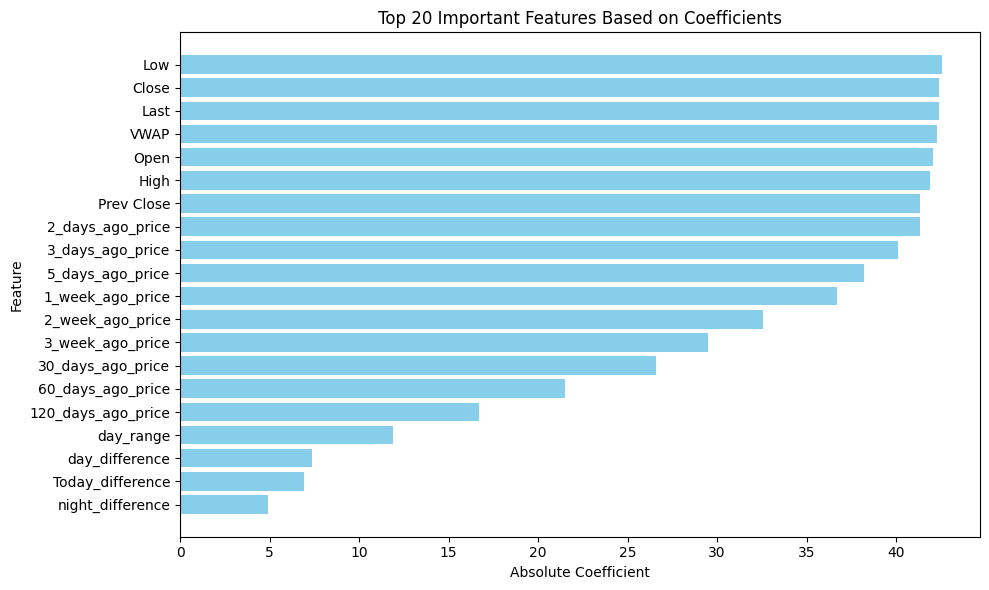

In [ ]:
coefficients = model_en.coef_

# Create a DataFrame for feature importance (with feature names if available)
# Assuming you have feature names in X_train (columns)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,  # If X_train is a DataFrame, otherwise you can use a list of feature names
    'Coefficient': coefficients
})

# Sort by absolute coefficient value to get the most important features
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].apply(np.abs)
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

top_10_features = feature_importance.head(20)

# Plot the top 10 features using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Absolute Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Important Features Based on Coefficients')
plt.gca().invert_yaxis()  # To display the highest coefficient at the top
plt.tight_layout()
plt.show()

In [ ]:
df_prediction =  X_test.copy()
df_prediction[numeric_cols] = scaler.inverse_transform(df_prediction[numeric_cols])
df_prediction["Elastic_net_predictions"] = y_pred
df_prediction["Next_Close"] = y_test

<Figure size 1200x50000 with 0 Axes>

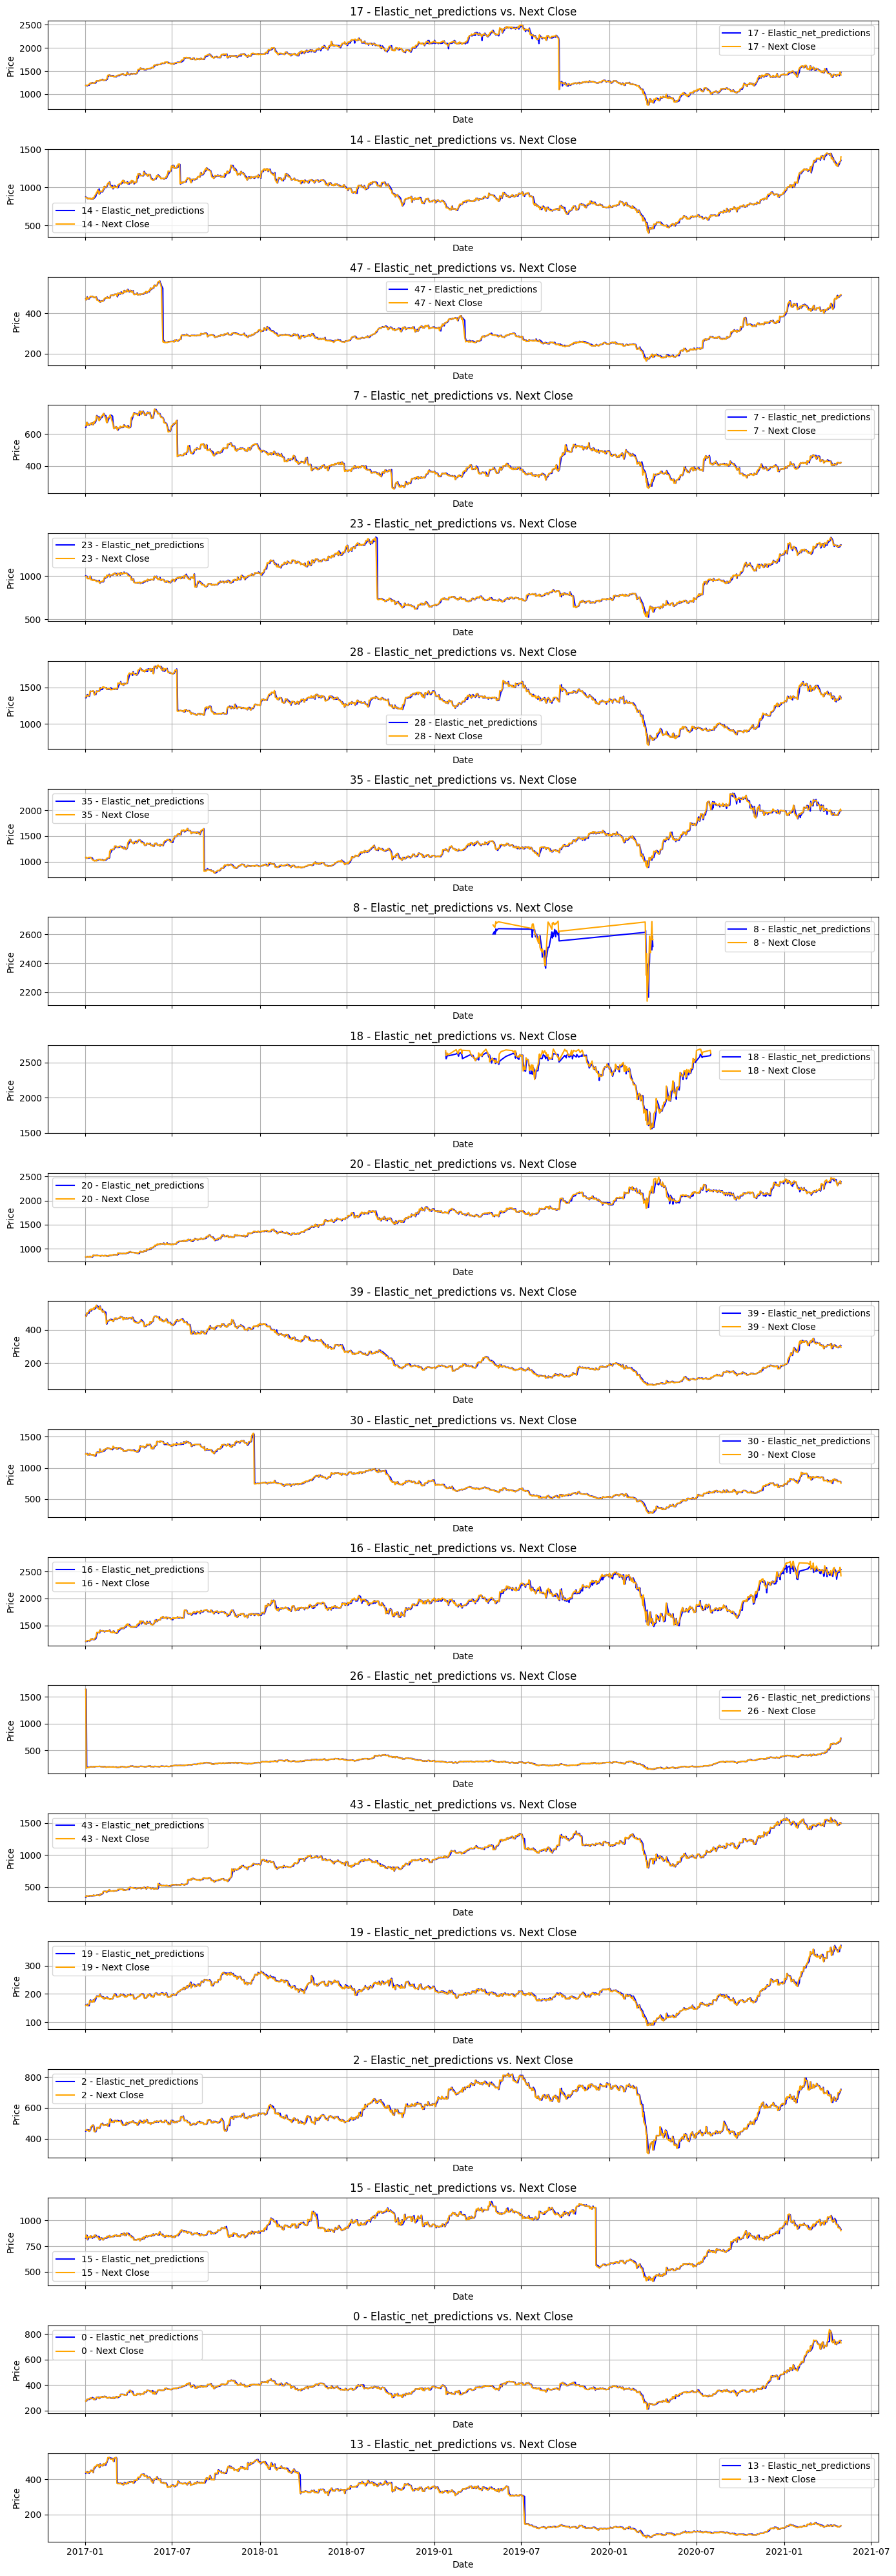

In [ ]:
plt.figure(figsize=(12, 500))
df_prediction['Date'] = pd.to_datetime(df_prediction[['year', 'month', 'dayofmonth']].rename(columns={'dayofmonth': 'day'}))
companies = df_prediction['Company'].unique()[:20]
# Create subplots, one for each company
fig, axes = plt.subplots(len(companies), 1, figsize=(14,40), sharex=True)

# If there is only one company, `axes` will not be a list, so we make it a list
if len(companies) == 1:
    axes = [axes]

# Loop through each company and create a plot for it
for i, company in enumerate(companies):
    company_data = df_prediction[df_prediction['Company'] == company]

    # Plot the xgb_predictions vs. Date
    axes[i].plot(company_data['Date'], company_data['Elastic_net_predictions'], label=f'{company} - Elastic_net_predictions', color='blue')

    # Plot the Next_Close vs. Date
    axes[i].plot(company_data['Date'], company_data['Next_Close'], label=f'{company} - Next Close', color='orange')

    # Customize the plot for this company
    axes[i].set_title(f'{company} - Elastic_net_predictions vs. Next Close')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].grid(True)
    axes[i].legend()

# Adjust layout so that the plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42, max_depth=7, max_features=None)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
y_pred_2 = model_dt.predict(X_train)
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

RMSE for test: 24.83585207952013  RMSE for train: 26.02122086656547



In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42, max_depth=9, max_features=None)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
y_pred_2 = model_dt.predict(X_train)
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

RMSE for test: 47.81285258666056  RMSE for train: 22.181638311696265



In [ ]:
y_pred

array([1192.86456494, 1192.86456494, 1192.86456494, ...,  215.43821403,
        222.4266118 ,  222.4266118 ])

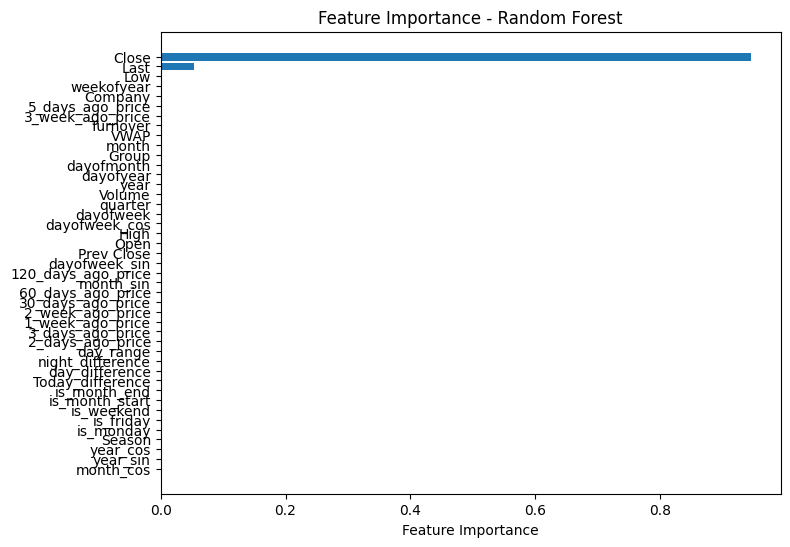

In [ ]:
feature_importances = model_dt.feature_importances_

# Sorting feature importances
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.figure(figsize=(8, 6))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42, max_depth=6, max_features="sqrt")
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
y_pred_2 = model_dt.predict(X_train)
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

RMSE for test: 43.36016524245989  RMSE for train: 44.4165722594859



In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42, max_depth=9, max_features="log2")
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
y_pred_2 = model_dt.predict(X_train)
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

RMSE for test: 31.441028061642932  RMSE for train: 31.96918852965953



In [ ]:
rmse(y_test, [490]*len(y_test))

714.1437641343468

In [ ]:
X_test["Last"].values

array([ 0.82330321,  0.81003325,  0.80805512, ..., -0.79488995,
       -0.78673016, -0.78928524])

In [ ]:
# guessing last price
rmse(y_test, 606.634816 * X_test["Last"].values + 698.606782)

98.62994336590614

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dt = DecisionTreeRegressor(random_state=42, max_features=None)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
y_pred_2 = model_dt.predict(X_train)
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

RMSE for test: 82.15304460815143  RMSE for train: 1.9602478669720545e-16



In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_dt = RandomForestRegressor(random_state=42, max_depth=7, max_features=None, n_estimators=20)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
y_pred_2 = model_dt.predict(X_train)
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

RMSE for test: 24.080000250707524  RMSE for train: 25.738097036812135



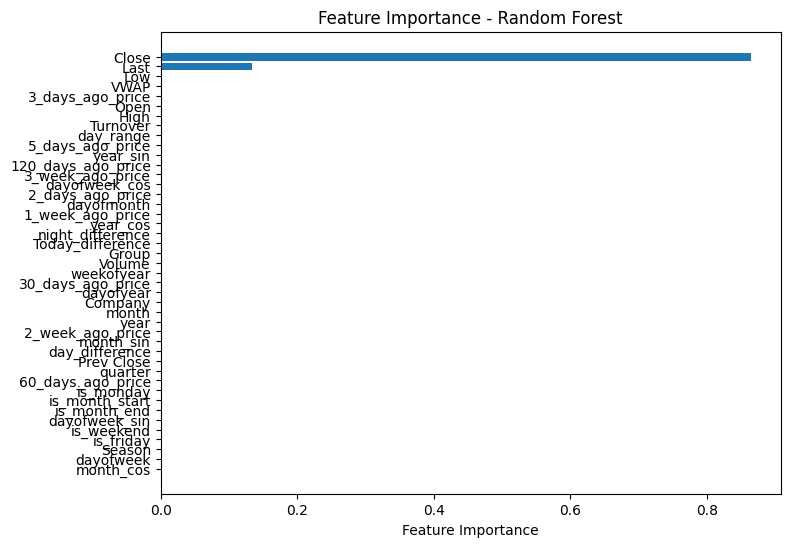

In [ ]:
feature_importances = model_dt.feature_importances_

# Sorting feature importances
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order
plt.figure(figsize=(8, 6))
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_dt = RandomForestRegressor(random_state=42, max_depth=7, max_features="sqrt", n_estimators=100)
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
y_pred_2 = model_dt.predict(X_train)
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

RMSE for test: 24.839007133689414  RMSE for train: 27.377594170220593



In [ ]:
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(random_state=42, learning_rate=0.05, n_estimators=125, max_depth=5, colsample_bytree=0.7,  min_child_samples=2, n_jobs=-1)
model_lgb.fit(X_train, y_train)

# Make predictions on both test and train sets
y_pred = model_lgb.predict(X_test)
y_pred_2 = model_lgb.predict(X_train)

# Calculate RMSE for both test and train sets
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)

# Print the RMSE results
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.190815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6372
[LightGBM] [Info] Number of data points in the train set: 170477, number of used features: 43
[LightGBM] [Info] Start training from score 679.238967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
import xgboost as xgb

# for i in [0, 1e-5, 1e-3, 0.1, 1, 5, 10]:
  # for j in range(6, 11):
model_xgb = xgb.XGBRegressor(random_state=42, learning_rate=0.05, n_estimators=125, max_depth=5, colsample_bytree=0.7,  min_child_weight=2, n_jobs=-1)

# Train the model
model_xgb.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=25)
y_pred = model_xgb.predict(X_test)
y_pred_2 = model_xgb.predict(X_train)
rmse_ = rmse(y_test, y_pred)
rmse_2 = rmse(y_train, y_pred_2)
print(f"RMSE for test: {rmse_}  RMSE for train: {rmse_2}\n") #(i, j): ({i}, )

[0]	validation_0-rmse:628.46536
[25]	validation_0-rmse:176.70992
[50]	validation_0-rmse:54.70367
[75]	validation_0-rmse:27.95683
[100]	validation_0-rmse:24.64626
[124]	validation_0-rmse:24.59688
RMSE for test: 24.59687587819193  RMSE for train: 27.920162437170568



In [ ]:
# all_predictions = np.concatenate([y_pred_2, y_pred])

In [ ]:
df_prediction =  X_test.copy()
df_prediction[numeric_cols] = scaler.inverse_transform(df_prediction[numeric_cols])
df_prediction["xgb_predictions"] = y_pred
df_prediction["Next_Close"] = y_test
df_prediction

Company  Prev Close     Open     High      Low     Last    Close  \
4235         17     1206.20  1209.45  1210.10  1192.05  1198.05  1197.10   
4236         17     1197.10  1200.80  1201.95  1185.75  1190.00  1189.90   
4237         17     1189.90  1189.85  1192.00  1183.80  1188.80  1185.50   
4238         17     1185.50  1189.00  1194.50  1183.10  1185.00  1186.20   
4239         17     1186.20  1190.10  1198.40  1188.20  1194.50  1193.65   
...         ...         ...      ...      ...      ...      ...      ...   
470378       34      203.45   204.30   212.90   204.00   210.90   211.15   
470379       34      211.15   208.20   216.45   208.20   215.75   215.80   
470380       34      215.80   216.05   220.50   215.80   216.40   216.65   
470381       34      216.65   218.80   221.70   216.30   221.35   220.90   
470382       34      220.90   223.10   223.65   219.05   219.80   220.15   

           VWAP      Volume      Turnover  dayofweek  quarter  month    year  \
4235    1198.08    927164.0  1.110816e+14        0.0      1.0    1.0  2017.0   
4236    1192.50    961875.0  1.147035e+14        1.0      1.0    1.0  2017.0   
4237    1187.86   1741780.0  2.068990e+14        2.0      1.0    1.0  2017.0   
4238    1186.93   1694096.0  2.010774e+14        3.0      1.0    1.0  2017.0   
4239    1192.99   1381315.0  1.647897e+14        4.0      1.0    1.0  2017.0   
...         ...         ...           ...        ...      ...    ...     ...   
470378   211.30  21553903.0  4.554345e+14        4.0      2.0    4.0  2021.0   
470379   213.23  10765892.0  2.295642e+14        0.0      2.0    4.0  2021.0   
470380   217.89   8589721.0  1.871605e+14        1.0      2.0    4.0  2021.0   
470381   219.20   9215766.0  2.020103e+14        2.0      2.0    4.0  2021.0   
470382   220.60   8303610.0  1.831748e+14        3.0      2.0    4.0  2021.0   

        dayofyear  dayofmonth  weekofyear  Group  dayofweek_sin  \
4235          2.0         2.0         1.0  340.0       0.000000   
4236          3.0         3.0         1.0  340.0       0.781832   
4237          4.0         4.0         1.0  340.0       0.974928   
4238          5.0         5.0         1.0  340.0       0.433884   
4239          6.0         6.0         1.0  340.0      -0.433884   
...           ...         ...         ...    ...            ...   
470378      113.0        23.0        16.0  547.0      -0.433884   
470379      116.0        26.0        17.0  547.0       0.000000   
470380      117.0        27.0        17.0  547.0       0.781832   
470381      118.0        28.0        17.0  548.0       0.974928   
470382      119.0        29.0        17.0  548.0       0.433884   

        dayofweek_cos  month_sin  month_cos  year_sin  year_cos  Season  \
4235         1.000000   0.500000   0.866025  0.294755  0.955573       3   
4236         0.623490   0.500000   0.866025  0.294755  0.955573       3   
4237        -0.222521   0.500000   0.866025  0.294755  0.955573       3   
4238        -0.900969   0.500000   0.866025  0.294755  0.955573       3   
4239        -0.900969   0.500000   0.866025  0.294755  0.955573       3   
...               ...        ...        ...       ...       ...     ...   
470378      -0.900969   0.866025  -0.500000  0.997204  0.074730       1   
470379       1.000000   0.866025  -0.500000  0.997204  0.074730       1   
470380       0.623490   0.866025  -0.500000  0.997204  0.074730       1   
470381      -0.222521   0.866025  -0.500000  0.997204  0.074730       1   
470382      -0.900969   0.866025  -0.500000  0.997204  0.074730       1   

        is_monday  is_friday  is_weekend  is_month_start  is_month_end  \
4235          1.0        0.0         0.0             0.0           0.0   
4236          0.0        0.0         0.0             0.0           0.0   
4237          0.0        0.0         0.0             0.0           0.0   
4238          0.0        0.0         0.0             0.0           0.0   
4239          0.0        1.0         0.0             0.0  

<Figure size 1200x50000 with 0 Axes>

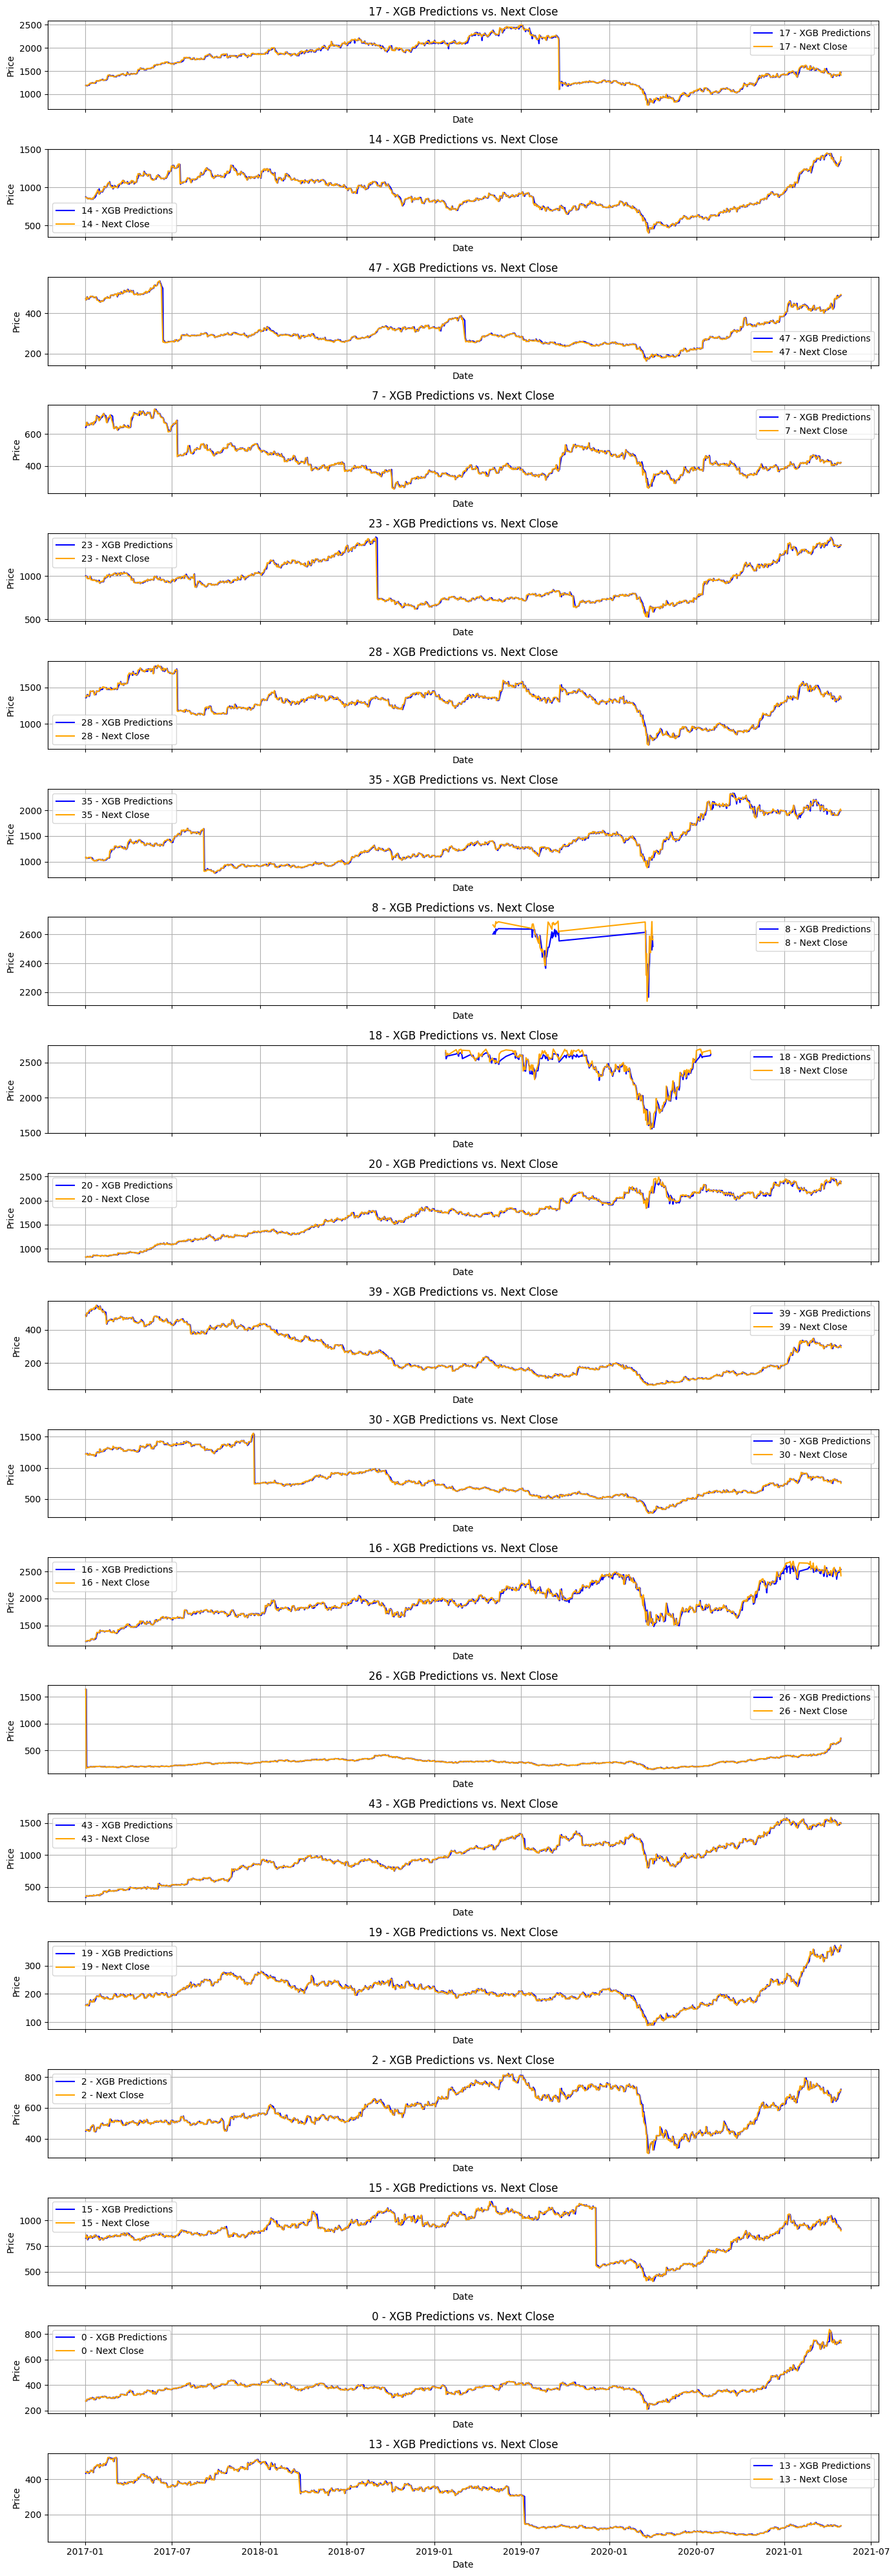

In [ ]:
plt.figure(figsize=(12, 500))
df_prediction['Date'] = pd.to_datetime(df_prediction[['year', 'month', 'dayofmonth']].rename(columns={'dayofmonth': 'day'}))
companies = df_prediction['Company'].unique()[:20]
# Create subplots, one for each company
fig, axes = plt.subplots(len(companies), 1, figsize=(14,40), sharex=True)

# If there is only one company, `axes` will not be a list, so we make it a list
if len(companies) == 1:
    axes = [axes]

# Loop through each company and create a plot for it
for i, company in enumerate(companies):
    company_data = df_prediction[df_prediction['Company'] == company]

    # Plot the xgb_predictions vs. Date
    axes[i].plot(company_data['Date'], company_data['xgb_predictions'], label=f'{company} - XGB Predictions', color='blue')

    # Plot the Next_Close vs. Date
    axes[i].plot(company_data['Date'], company_data['Next_Close'], label=f'{company} - Next Close', color='orange')

    # Customize the plot for this company
    axes[i].set_title(f'{company} - XGB Predictions vs. Next Close')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price')
    axes[i].grid(True)
    axes[i].legend()

# Adjust layout so that the plots do not overlap
plt.tight_layout()

# Show the plot
plt.show()

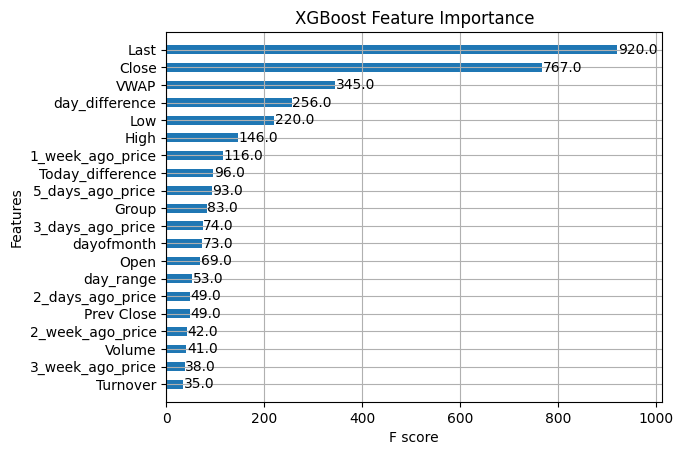

In [ ]:
xgb.plot_importance(model_xgb,
                    importance_type='weight',  # Options: 'weight', 'gain', 'cover'
                    max_num_features=20,      # Limit to the top 10 most important features
                    title='XGBoost Feature Importance',
                    height=0.5)  # Controls bar height

plt.show()

In [ ]:
!pip install optuna --quiet
import optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
def objective(trial):
    params = {
        # 'num_leaves': trial.suggest_int('num_leaves', 20, 40),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 7),
        'max_depth': trial.suggest_int('max_depth', 5, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.05, 0.1, log=True),
        # 'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.6, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-4, 1, log=True),
        # 'reg_lambda': trial.suggest_float('reg_lambda', 1e-5, 1, log=True),
    }
    print(f"Trial {trial.number} hyperparameters:")
    for key, value in params.items():
        print(f"  {key}: {value}")
    model = lgb.LGBMRegressor(random_state=42, verbose=-1, n_estimators=200, **params)
    model.fit(X_train, y_train)
    y_pred =  model.predict(X_test)
    rmse_ = rmse(y_test, y_pred)
    print(f"Trial {trial.number} RMSE: {rmse_}")
    return rmse_

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2025-03-02 17:46:05,424] A new study created in memory with name: no-name-57543746-c0b6-49b7-93b2-1ea790922f85


Trial 0 hyperparameters:
  min_child_samples: 3
  max_depth: 5
  learning_rate: 0.06086226830342351
  subsample: 0.8635310611136098
  colsample_bytree: 0.8240134919825093
  reg_alpha: 0.002170727700423119


[I 2025-03-02 17:46:15,258] Trial 0 finished with value: 31.108922283513156 and parameters: {'min_child_samples': 3, 'max_depth': 5, 'learning_rate': 0.06086226830342351, 'subsample': 0.8635310611136098, 'colsample_bytree': 0.8240134919825093, 'reg_alpha': 0.002170727700423119}. Best is trial 0 with value: 31.108922283513156.


Trial 0 RMSE: 31.108922283513156
Trial 1 hyperparameters:
  min_child_samples: 2
  max_depth: 9
  learning_rate: 0.06642350385731666
  subsample: 0.740358346869867
  colsample_bytree: 0.7904421574024547
  reg_alpha: 0.4957165613236947


[I 2025-03-02 17:46:23,811] Trial 1 finished with value: 43.4867155176819 and parameters: {'min_child_samples': 2, 'max_depth': 9, 'learning_rate': 0.06642350385731666, 'subsample': 0.740358346869867, 'colsample_bytree': 0.7904421574024547, 'reg_alpha': 0.4957165613236947}. Best is trial 0 with value: 31.108922283513156.


Trial 1 RMSE: 43.4867155176819
Trial 2 hyperparameters:
  min_child_samples: 4
  max_depth: 10
  learning_rate: 0.09134376186791397
  subsample: 0.7010407061452945
  colsample_bytree: 0.6946824564298834
  reg_alpha: 0.006748914621076374


[I 2025-03-02 17:46:30,108] Trial 2 finished with value: 34.84391474176123 and parameters: {'min_child_samples': 4, 'max_depth': 10, 'learning_rate': 0.09134376186791397, 'subsample': 0.7010407061452945, 'colsample_bytree': 0.6946824564298834, 'reg_alpha': 0.006748914621076374}. Best is trial 0 with value: 31.108922283513156.


Trial 2 RMSE: 34.84391474176123
Trial 3 hyperparameters:
  min_child_samples: 3
  max_depth: 10
  learning_rate: 0.0502843193838879
  subsample: 0.8606887128244907
  colsample_bytree: 0.6355148428491794
  reg_alpha: 0.0007955499726849073


[I 2025-03-02 17:46:38,288] Trial 3 finished with value: 32.891912718533725 and parameters: {'min_child_samples': 3, 'max_depth': 10, 'learning_rate': 0.0502843193838879, 'subsample': 0.8606887128244907, 'colsample_bytree': 0.6355148428491794, 'reg_alpha': 0.0007955499726849073}. Best is trial 0 with value: 31.108922283513156.


Trial 3 RMSE: 32.891912718533725
Trial 4 hyperparameters:
  min_child_samples: 1
  max_depth: 6
  learning_rate: 0.08096964860647667
  subsample: 0.9495399365077177
  colsample_bytree: 0.9093858638886055
  reg_alpha: 0.698886922313671


[I 2025-03-02 17:46:45,060] Trial 4 finished with value: 37.88746251282626 and parameters: {'min_child_samples': 1, 'max_depth': 6, 'learning_rate': 0.08096964860647667, 'subsample': 0.9495399365077177, 'colsample_bytree': 0.9093858638886055, 'reg_alpha': 0.698886922313671}. Best is trial 0 with value: 31.108922283513156.


Trial 4 RMSE: 37.88746251282626
Trial 5 hyperparameters:
  min_child_samples: 7
  max_depth: 10
  learning_rate: 0.05935100016209315
  subsample: 0.8985841272954173
  colsample_bytree: 0.9564050726228746
  reg_alpha: 0.005984033495715821


[I 2025-03-02 17:46:54,719] Trial 5 finished with value: 30.33840285942987 and parameters: {'min_child_samples': 7, 'max_depth': 10, 'learning_rate': 0.05935100016209315, 'subsample': 0.8985841272954173, 'colsample_bytree': 0.9564050726228746, 'reg_alpha': 0.005984033495715821}. Best is trial 5 with value: 30.33840285942987.


Trial 5 RMSE: 30.33840285942987
Trial 6 hyperparameters:
  min_child_samples: 7
  max_depth: 7
  learning_rate: 0.07347728276175909
  subsample: 0.6408475186829219
  colsample_bytree: 0.8720444362303112
  reg_alpha: 0.00892805341202345


[I 2025-03-02 17:47:03,818] Trial 6 finished with value: 31.63986153626258 and parameters: {'min_child_samples': 7, 'max_depth': 7, 'learning_rate': 0.07347728276175909, 'subsample': 0.6408475186829219, 'colsample_bytree': 0.8720444362303112, 'reg_alpha': 0.00892805341202345}. Best is trial 5 with value: 30.33840285942987.


Trial 6 RMSE: 31.63986153626258
Trial 7 hyperparameters:
  min_child_samples: 7
  max_depth: 6
  learning_rate: 0.08966151241745225
  subsample: 0.6928507777603016
  colsample_bytree: 0.7906506691466325
  reg_alpha: 0.015340699021359878


[I 2025-03-02 17:47:11,887] Trial 7 finished with value: 32.04777442496209 and parameters: {'min_child_samples': 7, 'max_depth': 6, 'learning_rate': 0.08966151241745225, 'subsample': 0.6928507777603016, 'colsample_bytree': 0.7906506691466325, 'reg_alpha': 0.015340699021359878}. Best is trial 5 with value: 30.33840285942987.


Trial 7 RMSE: 32.04777442496209
Trial 8 hyperparameters:
  min_child_samples: 4
  max_depth: 10
  learning_rate: 0.08109236253588607
  subsample: 0.7423737096792827
  colsample_bytree: 0.612756208376819
  reg_alpha: 0.0005683221950219954


[I 2025-03-02 17:47:19,142] Trial 8 finished with value: 31.79526686454431 and parameters: {'min_child_samples': 4, 'max_depth': 10, 'learning_rate': 0.08109236253588607, 'subsample': 0.7423737096792827, 'colsample_bytree': 0.612756208376819, 'reg_alpha': 0.0005683221950219954}. Best is trial 5 with value: 30.33840285942987.


Trial 8 RMSE: 31.79526686454431
Trial 9 hyperparameters:
  min_child_samples: 7
  max_depth: 8
  learning_rate: 0.099781154404144
  subsample: 0.8644594400665547
  colsample_bytree: 0.8048921439153881
  reg_alpha: 0.24862101891426652


[I 2025-03-02 17:47:25,826] Trial 9 finished with value: 34.52138386009598 and parameters: {'min_child_samples': 7, 'max_depth': 8, 'learning_rate': 0.099781154404144, 'subsample': 0.8644594400665547, 'colsample_bytree': 0.8048921439153881, 'reg_alpha': 0.24862101891426652}. Best is trial 5 with value: 30.33840285942987.


Trial 9 RMSE: 34.52138386009598
Trial 10 hyperparameters:
  min_child_samples: 6
  max_depth: 8
  learning_rate: 0.054865203839437646
  subsample: 0.9991693636639276
  colsample_bytree: 0.9636657024063653
  reg_alpha: 0.00013612581495394457


[I 2025-03-02 17:47:34,888] Trial 10 finished with value: 30.27110108643954 and parameters: {'min_child_samples': 6, 'max_depth': 8, 'learning_rate': 0.054865203839437646, 'subsample': 0.9991693636639276, 'colsample_bytree': 0.9636657024063653, 'reg_alpha': 0.00013612581495394457}. Best is trial 10 with value: 30.27110108643954.


Trial 10 RMSE: 30.27110108643954
Trial 11 hyperparameters:
  min_child_samples: 6
  max_depth: 8
  learning_rate: 0.05515017089501407
  subsample: 0.9897490337819237
  colsample_bytree: 0.9993320066172023
  reg_alpha: 0.00010704254911447444


[I 2025-03-02 17:47:44,149] Trial 11 finished with value: 30.591904069466942 and parameters: {'min_child_samples': 6, 'max_depth': 8, 'learning_rate': 0.05515017089501407, 'subsample': 0.9897490337819237, 'colsample_bytree': 0.9993320066172023, 'reg_alpha': 0.00010704254911447444}. Best is trial 10 with value: 30.27110108643954.


Trial 11 RMSE: 30.591904069466942
Trial 12 hyperparameters:
  min_child_samples: 5
  max_depth: 9
  learning_rate: 0.058890395521583004
  subsample: 0.9263248497884768
  colsample_bytree: 0.9757623572088959
  reg_alpha: 0.00010534205351605356


[I 2025-03-02 17:47:51,654] Trial 12 finished with value: 28.662568015297445 and parameters: {'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.058890395521583004, 'subsample': 0.9263248497884768, 'colsample_bytree': 0.9757623572088959, 'reg_alpha': 0.00010534205351605356}. Best is trial 12 with value: 28.662568015297445.


Trial 12 RMSE: 28.662568015297445
Trial 13 hyperparameters:
  min_child_samples: 5
  max_depth: 9
  learning_rate: 0.050157367812300735
  subsample: 0.9857581721075465
  colsample_bytree: 0.9354937041655786
  reg_alpha: 0.00010634059770774823


[I 2025-03-02 17:48:00,817] Trial 13 finished with value: 29.3086243857176 and parameters: {'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.050157367812300735, 'subsample': 0.9857581721075465, 'colsample_bytree': 0.9354937041655786, 'reg_alpha': 0.00010634059770774823}. Best is trial 12 with value: 28.662568015297445.


Trial 13 RMSE: 29.3086243857176
Trial 14 hyperparameters:
  min_child_samples: 5
  max_depth: 9
  learning_rate: 0.05057747726438806
  subsample: 0.9424449775661683
  colsample_bytree: 0.8950097720427239
  reg_alpha: 0.00037471786219202264


[I 2025-03-02 17:48:09,273] Trial 14 finished with value: 30.81591387892619 and parameters: {'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.05057747726438806, 'subsample': 0.9424449775661683, 'colsample_bytree': 0.8950097720427239, 'reg_alpha': 0.00037471786219202264}. Best is trial 12 with value: 28.662568015297445.


Trial 14 RMSE: 30.81591387892619
Trial 15 hyperparameters:
  min_child_samples: 5
  max_depth: 9
  learning_rate: 0.06485483362531562
  subsample: 0.803787375201155
  colsample_bytree: 0.9372005805554617
  reg_alpha: 0.06003414099927542


[I 2025-03-02 17:48:18,467] Trial 15 finished with value: 30.75313243751285 and parameters: {'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.06485483362531562, 'subsample': 0.803787375201155, 'colsample_bytree': 0.9372005805554617, 'reg_alpha': 0.06003414099927542}. Best is trial 12 with value: 28.662568015297445.


Trial 15 RMSE: 30.75313243751285
Trial 16 hyperparameters:
  min_child_samples: 5
  max_depth: 9
  learning_rate: 0.05522042668996774
  subsample: 0.9357624133061091
  colsample_bytree: 0.9980659880894012
  reg_alpha: 0.00031116612912683366


[I 2025-03-02 17:48:27,522] Trial 16 finished with value: 31.477111167445358 and parameters: {'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.05522042668996774, 'subsample': 0.9357624133061091, 'colsample_bytree': 0.9980659880894012, 'reg_alpha': 0.00031116612912683366}. Best is trial 12 with value: 28.662568015297445.


Trial 16 RMSE: 31.477111167445358
Trial 17 hyperparameters:
  min_child_samples: 6
  max_depth: 7
  learning_rate: 0.060151272885975
  subsample: 0.8188622846063038
  colsample_bytree: 0.733403690117471
  reg_alpha: 0.0009472789277436654


[I 2025-03-02 17:48:34,821] Trial 17 finished with value: 32.18674511197904 and parameters: {'min_child_samples': 6, 'max_depth': 7, 'learning_rate': 0.060151272885975, 'subsample': 0.8188622846063038, 'colsample_bytree': 0.733403690117471, 'reg_alpha': 0.0009472789277436654}. Best is trial 12 with value: 28.662568015297445.


Trial 17 RMSE: 32.18674511197904
Trial 18 hyperparameters:
  min_child_samples: 3
  max_depth: 9
  learning_rate: 0.06964709368707042
  subsample: 0.9072520594912717
  colsample_bytree: 0.8582788557931832
  reg_alpha: 0.0019177400689626889


[I 2025-03-02 17:48:43,669] Trial 18 finished with value: 33.28489347975255 and parameters: {'min_child_samples': 3, 'max_depth': 9, 'learning_rate': 0.06964709368707042, 'subsample': 0.9072520594912717, 'colsample_bytree': 0.8582788557931832, 'reg_alpha': 0.0019177400689626889}. Best is trial 12 with value: 28.662568015297445.


Trial 18 RMSE: 33.28489347975255
Trial 19 hyperparameters:
  min_child_samples: 5
  max_depth: 8
  learning_rate: 0.05268712538973054
  subsample: 0.9667177225355787
  colsample_bytree: 0.9283504720099696
  reg_alpha: 0.00020202056875246954


[I 2025-03-02 17:48:51,294] Trial 19 finished with value: 30.535326714741725 and parameters: {'min_child_samples': 5, 'max_depth': 8, 'learning_rate': 0.05268712538973054, 'subsample': 0.9667177225355787, 'colsample_bytree': 0.9283504720099696, 'reg_alpha': 0.00020202056875246954}. Best is trial 12 with value: 28.662568015297445.


Trial 19 RMSE: 30.535326714741725
Trial 20 hyperparameters:
  min_child_samples: 4
  max_depth: 7
  learning_rate: 0.05817259152983023
  subsample: 0.9046643776349649
  colsample_bytree: 0.9678844064087178
  reg_alpha: 0.035177278326953956


[I 2025-03-02 17:49:00,961] Trial 20 finished with value: 33.67373578609104 and parameters: {'min_child_samples': 4, 'max_depth': 7, 'learning_rate': 0.05817259152983023, 'subsample': 0.9046643776349649, 'colsample_bytree': 0.9678844064087178, 'reg_alpha': 0.035177278326953956}. Best is trial 12 with value: 28.662568015297445.


Trial 20 RMSE: 33.67373578609104
Trial 21 hyperparameters:
  min_child_samples: 6
  max_depth: 8
  learning_rate: 0.05480308944409184
  subsample: 0.9993628145000232
  colsample_bytree: 0.9607575973254652
  reg_alpha: 0.00012241057012041294


[I 2025-03-02 17:49:10,036] Trial 21 finished with value: 31.271979114159834 and parameters: {'min_child_samples': 6, 'max_depth': 8, 'learning_rate': 0.05480308944409184, 'subsample': 0.9993628145000232, 'colsample_bytree': 0.9607575973254652, 'reg_alpha': 0.00012241057012041294}. Best is trial 12 with value: 28.662568015297445.


Trial 21 RMSE: 31.271979114159834
Trial 22 hyperparameters:
  min_child_samples: 6
  max_depth: 9
  learning_rate: 0.0634959312539936
  subsample: 0.9955817534562812
  colsample_bytree: 0.8782521265658623
  reg_alpha: 0.00010169568473669117


[I 2025-03-02 17:49:17,026] Trial 22 finished with value: 30.655853998368634 and parameters: {'min_child_samples': 6, 'max_depth': 9, 'learning_rate': 0.0634959312539936, 'subsample': 0.9955817534562812, 'colsample_bytree': 0.8782521265658623, 'reg_alpha': 0.00010169568473669117}. Best is trial 12 with value: 28.662568015297445.


Trial 22 RMSE: 30.655853998368634
Trial 23 hyperparameters:
  min_child_samples: 5
  max_depth: 8
  learning_rate: 0.05310481976636906
  subsample: 0.9644378611115789
  colsample_bytree: 0.9704780218500522
  reg_alpha: 0.00024489586971242574


[I 2025-03-02 17:49:26,193] Trial 23 finished with value: 29.879792427152466 and parameters: {'min_child_samples': 5, 'max_depth': 8, 'learning_rate': 0.05310481976636906, 'subsample': 0.9644378611115789, 'colsample_bytree': 0.9704780218500522, 'reg_alpha': 0.00024489586971242574}. Best is trial 12 with value: 28.662568015297445.


Trial 23 RMSE: 29.879792427152466
Trial 24 hyperparameters:
  min_child_samples: 4
  max_depth: 9
  learning_rate: 0.05017801993921576
  subsample: 0.920589309598061
  colsample_bytree: 0.9190778018594666
  reg_alpha: 0.0019935540922218246


[I 2025-03-02 17:49:34,586] Trial 24 finished with value: 29.934806180944967 and parameters: {'min_child_samples': 4, 'max_depth': 9, 'learning_rate': 0.05017801993921576, 'subsample': 0.920589309598061, 'colsample_bytree': 0.9190778018594666, 'reg_alpha': 0.0019935540922218246}. Best is trial 12 with value: 28.662568015297445.


Trial 24 RMSE: 29.934806180944967
Trial 25 hyperparameters:
  min_child_samples: 5
  max_depth: 8
  learning_rate: 0.05748879658514684
  subsample: 0.9718669953482815
  colsample_bytree: 0.9956388690197925
  reg_alpha: 0.0003066610271078487


[I 2025-03-02 17:49:42,324] Trial 25 finished with value: 30.231663856678644 and parameters: {'min_child_samples': 5, 'max_depth': 8, 'learning_rate': 0.05748879658514684, 'subsample': 0.9718669953482815, 'colsample_bytree': 0.9956388690197925, 'reg_alpha': 0.0003066610271078487}. Best is trial 12 with value: 28.662568015297445.


Trial 25 RMSE: 30.231663856678644
Trial 26 hyperparameters:
  min_child_samples: 4
  max_depth: 10
  learning_rate: 0.0521741592724509
  subsample: 0.8421275373892866
  colsample_bytree: 0.8391845517647182
  reg_alpha: 0.0002611411347995363


[I 2025-03-02 17:49:51,604] Trial 26 finished with value: 29.60545424568729 and parameters: {'min_child_samples': 4, 'max_depth': 10, 'learning_rate': 0.0521741592724509, 'subsample': 0.8421275373892866, 'colsample_bytree': 0.8391845517647182, 'reg_alpha': 0.0002611411347995363}. Best is trial 12 with value: 28.662568015297445.


Trial 26 RMSE: 29.60545424568729
Trial 27 hyperparameters:
  min_child_samples: 4
  max_depth: 10
  learning_rate: 0.05275211501899197
  subsample: 0.8330439761129729
  colsample_bytree: 0.8439669050118597
  reg_alpha: 0.0009556531665430386


[I 2025-03-02 17:49:59,614] Trial 27 finished with value: 29.898976212766282 and parameters: {'min_child_samples': 4, 'max_depth': 10, 'learning_rate': 0.05275211501899197, 'subsample': 0.8330439761129729, 'colsample_bytree': 0.8439669050118597, 'reg_alpha': 0.0009556531665430386}. Best is trial 12 with value: 28.662568015297445.


Trial 27 RMSE: 29.898976212766282
Trial 28 hyperparameters:
  min_child_samples: 2
  max_depth: 10
  learning_rate: 0.05728233837069655
  subsample: 0.778082249397879
  colsample_bytree: 0.7121773392590619
  reg_alpha: 0.0005025686850984153


[I 2025-03-02 17:50:07,976] Trial 28 finished with value: 43.61555013675212 and parameters: {'min_child_samples': 2, 'max_depth': 10, 'learning_rate': 0.05728233837069655, 'subsample': 0.778082249397879, 'colsample_bytree': 0.7121773392590619, 'reg_alpha': 0.0005025686850984153}. Best is trial 12 with value: 28.662568015297445.


Trial 28 RMSE: 43.61555013675212
Trial 29 hyperparameters:
  min_child_samples: 3
  max_depth: 5
  learning_rate: 0.06291674197246343
  subsample: 0.8632119932684987
  colsample_bytree: 0.8293449461150618
  reg_alpha: 0.003259604976529146


[I 2025-03-02 17:50:16,266] Trial 29 finished with value: 30.00077389605717 and parameters: {'min_child_samples': 3, 'max_depth': 5, 'learning_rate': 0.06291674197246343, 'subsample': 0.8632119932684987, 'colsample_bytree': 0.8293449461150618, 'reg_alpha': 0.003259604976529146}. Best is trial 12 with value: 28.662568015297445.


Trial 29 RMSE: 30.00077389605717
Trial 30 hyperparameters:
  min_child_samples: 4
  max_depth: 10
  learning_rate: 0.0683210058510183
  subsample: 0.8861633713645594
  colsample_bytree: 0.7533907649800196
  reg_alpha: 0.00022380907698340917


[I 2025-03-02 17:50:23,533] Trial 30 finished with value: 31.325496263750505 and parameters: {'min_child_samples': 4, 'max_depth': 10, 'learning_rate': 0.0683210058510183, 'subsample': 0.8861633713645594, 'colsample_bytree': 0.7533907649800196, 'reg_alpha': 0.00022380907698340917}. Best is trial 12 with value: 28.662568015297445.


Trial 30 RMSE: 31.325496263750505
Trial 31 hyperparameters:
  min_child_samples: 5
  max_depth: 9
  learning_rate: 0.052540017450440554
  subsample: 0.9693533886184331
  colsample_bytree: 0.8965854839349071
  reg_alpha: 0.00020862721897928847


[I 2025-03-02 17:50:32,618] Trial 31 finished with value: 31.12152725209173 and parameters: {'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.052540017450440554, 'subsample': 0.9693533886184331, 'colsample_bytree': 0.8965854839349071, 'reg_alpha': 0.00020862721897928847}. Best is trial 12 with value: 28.662568015297445.


Trial 31 RMSE: 31.12152725209173
Trial 32 hyperparameters:
  min_child_samples: 5
  max_depth: 9
  learning_rate: 0.052663438342133544
  subsample: 0.932005298153816
  colsample_bytree: 0.9364563362344271
  reg_alpha: 0.0012848025166976305


[I 2025-03-02 17:50:41,212] Trial 32 finished with value: 28.47685420696588 and parameters: {'min_child_samples': 5, 'max_depth': 9, 'learning_rate': 0.052663438342133544, 'subsample': 0.932005298153816, 'colsample_bytree': 0.9364563362344271, 'reg_alpha': 0.0012848025166976305}. Best is trial 32 with value: 28.47685420696588.


Trial 32 RMSE: 28.47685420696588
Trial 33 hyperparameters:
  min_child_samples: 4
  max_depth: 9
  learning_rate: 0.0620063518999854
  subsample: 0.9247733204652662
  colsample_bytree: 0.9331392120126799
  reg_alpha: 0.0013482840965666784


[I 2025-03-02 17:50:50,611] Trial 33 finished with value: 29.89889070079947 and parameters: {'min_child_samples': 4, 'max_depth': 9, 'learning_rate': 0.0620063518999854, 'subsample': 0.9247733204652662, 'colsample_bytree': 0.9331392120126799, 'reg_alpha': 0.0013482840965666784}. Best is trial 32 with value: 28.47685420696588.


Trial 33 RMSE: 29.89889070079947
Trial 34 hyperparameters:
  min_child_samples: 5
  max_depth: 10
  learning_rate: 0.05167000795083165
  subsample: 0.8806644276626907
  colsample_bytree: 0.9441961999121941
  reg_alpha: 0.003120899665817652


[I 2025-03-02 17:50:59,637] Trial 34 finished with value: 30.33638840958648 and parameters: {'min_child_samples': 5, 'max_depth': 10, 'learning_rate': 0.05167000795083165, 'subsample': 0.8806644276626907, 'colsample_bytree': 0.9441961999121941, 'reg_alpha': 0.003120899665817652}. Best is trial 32 with value: 28.47685420696588.


Trial 34 RMSE: 30.33638840958648
Trial 35 hyperparameters:
  min_child_samples: 2
  max_depth: 9
  learning_rate: 0.05670489628994969
  subsample: 0.8352869867995204
  colsample_bytree: 0.6609163118205084
  reg_alpha: 0.0004965733071847879


[I 2025-03-02 17:51:06,378] Trial 35 finished with value: 34.46727976649302 and parameters: {'min_child_samples': 2, 'max_depth': 9, 'learning_rate': 0.05670489628994969, 'subsample': 0.8352869867995204, 'colsample_bytree': 0.6609163118205084, 'reg_alpha': 0.0004965733071847879}. Best is trial 32 with value: 28.47685420696588.


Trial 35 RMSE: 34.46727976649302
Trial 36 hyperparameters:
  min_child_samples: 3
  max_depth: 10
  learning_rate: 0.06006225317418085
  subsample: 0.9494921640231611
  colsample_bytree: 0.9032892015527706
  reg_alpha: 0.00017329056949421035


[I 2025-03-02 17:51:15,169] Trial 36 finished with value: 33.32397268100205 and parameters: {'min_child_samples': 3, 'max_depth': 10, 'learning_rate': 0.06006225317418085, 'subsample': 0.9494921640231611, 'colsample_bytree': 0.9032892015527706, 'reg_alpha': 0.00017329056949421035}. Best is trial 32 with value: 28.47685420696588.


Trial 36 RMSE: 33.32397268100205
Trial 37 hyperparameters:
  min_child_samples: 6
  max_depth: 9
  learning_rate: 0.05409782189729907
  subsample: 0.7750635338678715
  colsample_bytree: 0.7579782840396647
  reg_alpha: 0.0004322200548999543


[I 2025-03-02 17:51:22,703] Trial 37 finished with value: 31.1393175009456 and parameters: {'min_child_samples': 6, 'max_depth': 9, 'learning_rate': 0.05409782189729907, 'subsample': 0.7750635338678715, 'colsample_bytree': 0.7579782840396647, 'reg_alpha': 0.0004322200548999543}. Best is trial 32 with value: 28.47685420696588.


Trial 37 RMSE: 31.1393175009456
Trial 38 hyperparameters:
  min_child_samples: 4
  max_depth: 10
  learning_rate: 0.07493192382159078
  subsample: 0.6076067066382743
  colsample_bytree: 0.8776826034114504
  reg_alpha: 0.0007218973137576495


[I 2025-03-02 17:51:31,470] Trial 38 finished with value: 32.51423794914362 and parameters: {'min_child_samples': 4, 'max_depth': 10, 'learning_rate': 0.07493192382159078, 'subsample': 0.6076067066382743, 'colsample_bytree': 0.8776826034114504, 'reg_alpha': 0.0007218973137576495}. Best is trial 32 with value: 28.47685420696588.


Trial 38 RMSE: 32.51423794914362
Trial 39 hyperparameters:
  min_child_samples: 5
  max_depth: 10
  learning_rate: 0.05000334653836305
  subsample: 0.8455340433427051
  colsample_bytree: 0.980125085168825
  reg_alpha: 0.001319728234020171


[I 2025-03-02 17:51:40,379] Trial 39 finished with value: 30.345687600170184 and parameters: {'min_child_samples': 5, 'max_depth': 10, 'learning_rate': 0.05000334653836305, 'subsample': 0.8455340433427051, 'colsample_bytree': 0.980125085168825, 'reg_alpha': 0.001319728234020171}. Best is trial 32 with value: 28.47685420696588.


Trial 39 RMSE: 30.345687600170184
Trial 40 hyperparameters:
  min_child_samples: 1
  max_depth: 9
  learning_rate: 0.05614355605257017
  subsample: 0.9246123542350273
  colsample_bytree: 0.8513534459823955
  reg_alpha: 0.016018503524049644


[I 2025-03-02 17:51:47,803] Trial 40 finished with value: 50.15348656409313 and parameters: {'min_child_samples': 1, 'max_depth': 9, 'learning_rate': 0.05614355605257017, 'subsample': 0.9246123542350273, 'colsample_bytree': 0.8513534459823955, 'reg_alpha': 0.016018503524049644}. Best is trial 32 with value: 28.47685420696588.


Trial 40 RMSE: 50.15348656409313
Trial 41 hyperparameters:
  min_child_samples: 5
  max_depth: 8
  learning_rate: 0.05343351251247383
  subsample: 0.9622805098599506
  colsample_bytree: 0.9769208606518904
  reg_alpha: 0.0002826290653923866


[I 2025-03-02 17:51:56,882] Trial 41 finished with value: 30.921248254849015 and parameters: {'min_child_samples': 5, 'max_depth': 8, 'learning_rate': 0.05343351251247383, 'subsample': 0.9622805098599506, 'colsample_bytree': 0.9769208606518904, 'reg_alpha': 0.0002826290653923866}. Best is trial 32 with value: 28.47685420696588.


Trial 41 RMSE: 30.921248254849015
Trial 42 hyperparameters:
  min_child_samples: 4
  max_depth: 7
  learning_rate: 0.05120820948893409
  subsample: 0.8824952215306551
  colsample_bytree: 0.91219940985061
  reg_alpha: 0.00017099277966873506


[I 2025-03-02 17:52:04,432] Trial 42 finished with value: 29.850566136340003 and parameters: {'min_child_samples': 4, 'max_depth': 7, 'learning_rate': 0.05120820948893409, 'subsample': 0.8824952215306551, 'colsample_bytree': 0.91219940985061, 'reg_alpha': 0.00017099277966873506}. Best is trial 32 with value: 28.47685420696588.


Trial 42 RMSE: 29.850566136340003
Trial 43 hyperparameters:
  min_child_samples: 4
  max_depth: 7
  learning_rate: 0.051609914433177494
  subsample: 0.8887112346401457
  colsample_bytree: 0.808494667871949
  reg_alpha: 0.0001601508274862071


[I 2025-03-02 17:52:13,634] Trial 43 finished with value: 28.895190676969687 and parameters: {'min_child_samples': 4, 'max_depth': 7, 'learning_rate': 0.051609914433177494, 'subsample': 0.8887112346401457, 'colsample_bytree': 0.808494667871949, 'reg_alpha': 0.0001601508274862071}. Best is trial 32 with value: 28.47685420696588.


Trial 43 RMSE: 28.895190676969687
Trial 44 hyperparameters:
  min_child_samples: 3
  max_depth: 6
  learning_rate: 0.05202371765153585
  subsample: 0.9005568012031369
  colsample_bytree: 0.8243646475973923
  reg_alpha: 0.00016660136297341554


[I 2025-03-02 17:52:23,013] Trial 44 finished with value: 30.028228027661363 and parameters: {'min_child_samples': 3, 'max_depth': 6, 'learning_rate': 0.05202371765153585, 'subsample': 0.9005568012031369, 'colsample_bytree': 0.8243646475973923, 'reg_alpha': 0.00016660136297341554}. Best is trial 32 with value: 28.47685420696588.


Trial 44 RMSE: 30.028228027661363
Trial 45 hyperparameters:
  min_child_samples: 4
  max_depth: 6
  learning_rate: 0.05810505388646086
  subsample: 0.854456142612823
  colsample_bytree: 0.8056204828356921
  reg_alpha: 0.00010068277014114347


[I 2025-03-02 17:52:30,927] Trial 45 finished with value: 29.2340498763204 and parameters: {'min_child_samples': 4, 'max_depth': 6, 'learning_rate': 0.05810505388646086, 'subsample': 0.854456142612823, 'colsample_bytree': 0.8056204828356921, 'reg_alpha': 0.00010068277014114347}. Best is trial 32 with value: 28.47685420696588.


Trial 45 RMSE: 29.2340498763204
Trial 46 hyperparameters:
  min_child_samples: 6
  max_depth: 6
  learning_rate: 0.06698108163112819
  subsample: 0.8723713848238237
  colsample_bytree: 0.7768043277633379
  reg_alpha: 0.00011963162644087788


[I 2025-03-02 17:52:39,609] Trial 46 finished with value: 30.31955844567017 and parameters: {'min_child_samples': 6, 'max_depth': 6, 'learning_rate': 0.06698108163112819, 'subsample': 0.8723713848238237, 'colsample_bytree': 0.7768043277633379, 'reg_alpha': 0.00011963162644087788}. Best is trial 32 with value: 28.47685420696588.


Trial 46 RMSE: 30.31955844567017
Trial 47 hyperparameters:
  min_child_samples: 5
  max_depth: 5
  learning_rate: 0.05868603002772538
  subsample: 0.9195808596525796
  colsample_bytree: 0.6822147456992509
  reg_alpha: 0.004936831420914563


[I 2025-03-02 17:52:46,409] Trial 47 finished with value: 29.807966998932848 and parameters: {'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.05868603002772538, 'subsample': 0.9195808596525796, 'colsample_bytree': 0.6822147456992509, 'reg_alpha': 0.004936831420914563}. Best is trial 32 with value: 28.47685420696588.


Trial 47 RMSE: 29.807966998932848
Trial 48 hyperparameters:
  min_child_samples: 4
  max_depth: 6
  learning_rate: 0.06122528017338991
  subsample: 0.9416203477551763
  colsample_bytree: 0.8012999401607814
  reg_alpha: 0.4400223967873517


[I 2025-03-02 17:52:55,036] Trial 48 finished with value: 31.4301418158219 and parameters: {'min_child_samples': 4, 'max_depth': 6, 'learning_rate': 0.06122528017338991, 'subsample': 0.9416203477551763, 'colsample_bytree': 0.8012999401607814, 'reg_alpha': 0.4400223967873517}. Best is trial 32 with value: 28.47685420696588.


Trial 48 RMSE: 31.4301418158219
Trial 49 hyperparameters:
  min_child_samples: 3
  max_depth: 7
  learning_rate: 0.07324799880802577
  subsample: 0.9832349953749914
  colsample_bytree: 0.9449642413109993
  reg_alpha: 0.0006789774460697631


[I 2025-03-02 17:53:03,367] Trial 49 finished with value: 34.282383623277134 and parameters: {'min_child_samples': 3, 'max_depth': 7, 'learning_rate': 0.07324799880802577, 'subsample': 0.9832349953749914, 'colsample_bytree': 0.9449642413109993, 'reg_alpha': 0.0006789774460697631}. Best is trial 32 with value: 28.47685420696588.


Trial 49 RMSE: 34.282383623277134


In [ ]:
# (i, j): (5, 2) RMSE for test: 24.58688

## **DL**

In [ ]:
import torch
import torchvision
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
inputs_train = X_train.values
inputs_test = X_test.values
target_train = y_train.values
target_test = y_test.values

inputs_train = torch.tensor(inputs_train, dtype=torch.float32)
inputs_test = torch.tensor(inputs_test, dtype=torch.float32)
target_train = torch.tensor(target_train, dtype=torch.float32)
target_test = torch.tensor(target_test, dtype=torch.float32)

In [ ]:
train_ds = TensorDataset(inputs_train, target_train)
test_ds = TensorDataset(inputs_test, target_test)

In [ ]:
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader = DataLoader(test_ds, batch_size=16)

In [ ]:
for x, y in train_loader:
    print(x.shape)
    print(y.shape)
    break

torch.Size([16, 42])
torch.Size([16])


In [ ]:
class StockPredictionmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(42, 64)
    self.layer2 = nn.Linear(64, 128)
    self.layer3 = nn.Linear(128, 1)
    self.dropout1 = nn.Dropout(0.4)  # Dropout after first hidden layer
    self.dropout2 = nn.Dropout(0.2)  # Dropout after second hidden layer
  def forward(self, x):
    x = torch.relu(self.linear1(x))
    x = self.dropout1(x)
    x = torch.relu(self.layer2(x))
    x = self.dropout2(x)
    x = self.layer3(x)
    return x

  def training_step(self, batch):
    inputs, targets = batch
    preds = self(inputs)
    preds = preds.squeeze(1)
    loss = F.l1_loss(preds, targets)
    return loss

  def validation_step(self, batch):
    inputs, targets = batch
    preds = self(inputs)
    preds = preds.squeeze(1)
    # loss = F.l1_loss(preds, targets)
    preds_cpu = preds.cpu()
    targets_cpu = targets.cpu()
    mse = torch.mean((torch.tensor(np.expm1(preds_cpu.detach().numpy())) - torch.tensor(np.expm1(targets_cpu.detach().numpy()))) ** 2)  # Mean Squared Error
    rmse = torch.sqrt(mse)  # Root Mean Squared Error
    return {'val_rmse': rmse.detach()}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_rmse'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
    return {'val_rmse': epoch_loss.item()}

  def epoch_end(self, epoch, result, loss):
    print(f"Epoch {epoch}, train_loss: {loss}, val_rmse: {result['val_rmse']}")

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.Adam):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, loss)
        history.append(result)
    return history

In [ ]:
def get_default_device():
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)

    def __len__(self):
        return len(self.dl)

device = get_default_device()
device

device(type='cuda')

In [ ]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [ ]:
model = to_device(StockPredictionmodel(), device)
result = evaluate(model, val_loader)
result

{'val_rmse': 2314.39208984375}

In [ ]:
# model.load_state_dict(torch.load('stock_prediction_model.pkl'))

<All keys matched successfully>

In [ ]:
history = []

In [ ]:
gpu_available = torch.cuda.is_available()
print(f"GPU Available: {gpu_available}")

GPU Available: True


In [ ]:
history += fit(3, 1e-3, model, train_loader, val_loader)
history

Epoch 0, train_loss: 0.2825876474380493, val_rmse: inf
Epoch 1, train_loss: 0.2654382586479187, val_rmse: 48150900.0
Epoch 2, train_loss: 0.35483062267303467, val_rmse: 2286087.0


[{'val_rmse': inf}, {'val_rmse': 48150900.0}, {'val_rmse': 2286087.0}]

In [ ]:
history += fit(5, 1e-3, model, train_loader, val_loader)
history

Epoch 0, train_loss: 0.26498520374298096, val_rmse: 17910.126953125
Epoch 1, train_loss: 0.16592952609062195, val_rmse: 17754.390625
Epoch 2, train_loss: 0.09993929415941238, val_rmse: 13426.779296875
Epoch 3, train_loss: 0.29219457507133484, val_rmse: 32025.189453125
Epoch 4, train_loss: 0.23033979535102844, val_rmse: 7940.2451171875


[{'val_rmse': inf},
 {'val_rmse': 48150900.0},
 {'val_rmse': 2286087.0},
 {'val_rmse': 17910.126953125},
 {'val_rmse': 17754.390625},
 {'val_rmse': 13426.779296875},
 {'val_rmse': 32025.189453125},
 {'val_rmse': 7940.2451171875}]

In [ ]:
history += fit(5, 1e-3, model, train_loader, val_loader)
history

Epoch 0, train_loss: 0.1344805359840393, val_rmse: 11145.95703125
Epoch 1, train_loss: 0.12735958397388458, val_rmse: 33827.296875
Epoch 2, train_loss: 0.16294707357883453, val_rmse: 42105.37890625
Epoch 3, train_loss: 0.19048543274402618, val_rmse: 12138.03125
Epoch 4, train_loss: 0.1457764357328415, val_rmse: 434381.1875


[{'val_rmse': inf},
 {'val_rmse': 48150900.0},
 {'val_rmse': 2286087.0},
 {'val_rmse': 17910.126953125},
 {'val_rmse': 17754.390625},
 {'val_rmse': 13426.779296875},
 {'val_rmse': 32025.189453125},
 {'val_rmse': 7940.2451171875},
 {'val_rmse': 11145.95703125},
 {'val_rmse': 33827.296875},
 {'val_rmse': 42105.37890625},
 {'val_rmse': 12138.03125},
 {'val_rmse': 434381.1875}]

In [ ]:
torch.save(model.state_dict(), 'stock_prediction_model.pkl')

# Stock Price Prediction Project

## Project Goal

The main objective of this project is to apply various data science and machine learning techniques to predict the next day's closing stock price for a diverse set of companies. This involves a comprehensive analytical approach to understand the underlying patterns in historical stock data.

## Data Source

The dataset used for this project is sourced from a Kaggle dataset (Nifty 50 Stocks). It contains historical stock data with key attributes relevant for time-series analysis:

- Date
- Company
- Previous Day Close Price
- Open Price
- High Price
- Low Price
- Last Traded Price
- Close Price
- VWAP (Volume Weighted Average Price)
- Volume
- Turnover

## Data Analysis and Preprocessing

A thorough data analysis and preprocessing pipeline was implemented:

1.  **Exploratory Data Analysis (EDA)**: Initial exploration was performed to understand the data distribution, identify potential issues, and visualize relationships between features. This included:
    *   Examining descriptive statistics of the numerical features.
    *   Visualizing the correlation matrix to understand feature dependencies.
    *   Generating scatter plot matrices to observe pairwise relationships between numerical features.
    *   Plotting the closing price over time for different companies to identify trends and patterns.
2.  **Data Cleaning**: Missing values were handled by removing corresponding rows. Outliers in the target variable ('Next Close') were identified and removed using the Interquartile Range (IQR) method to improve model robustness.
3.  **Feature Engineering**: A rich set of features was engineered to capture temporal patterns, price dynamics, and historical context. These include:
    *   **Time-based features**: Extracting components like day of week, month, year, quarter, day of year, day of month, and week of year.
    *   **Cyclic features**: Applying sine and cosine transformations to cyclical time features (day of week, month, year) to capture their periodic nature.
    *   **Price difference features**: Calculating differences between various price points (e.g., Open-Close, Close-Prev Close) to represent daily and overnight movements.
    *   **Daily range**: Computing the difference between High and Low prices to represent volatility.
    *   **Historical price features**: Generating lagged closing prices for different time intervals (2, 3, 5, 7, 14, 21, 30, 60, and 120 days ago) to incorporate historical context.
4.  **Feature Transformation**:
    *   Categorical features (`Company`, `Season`) were encoded using Label Encoding.
    *   Numerical features were scaled using StandardScaler to ensure they contribute equally to the models and prevent features with larger scales from dominating. The distribution of the target variable was also analyzed to consider potential transformations (e.g., power transformations, log transformations) although ultimately not applied in the final models presented.

## Model Development and Evaluation

The project explored a variety of machine learning models suitable for regression tasks:

1.  **Linear Models**: Linear Regression, Lasso, Ridge, and Elastic Net were implemented as baseline models.
2.  **Tree-based Models**: Decision Tree Regressor and Random Forest Regressor were used to capture non-linear relationships and feature interactions. Feature importance was analyzed for these models.
3.  **Gradient Boosting Models**: LightGBM and XGBoost, known for their high performance in structured data tasks, were implemented. Hyperparameter tuning for LightGBM was performed using Optuna to find optimal configurations. Feature importance was also analyzed for XGBoost.

The models were trained on data up to '2016-12-31' and evaluated on data from '2017-01-01' onwards. The primary evaluation metric was the Root Mean Squared Error (RMSE), which measures the typical difference between predicted and actual values. Visualizations comparing the predicted and actual stock prices over time were generated to qualitatively assess model performance.

## Results

The evaluation demonstrated that the gradient boosting models, particularly XGBoost, achieved the lowest RMSE on the test set, indicating superior predictive accuracy compared to the other models explored. The feature importance analysis provided insights into which features were most influential in predicting stock prices.

## Future Work

Potential areas for further analytical and data science exploration include:

*   Investigating more advanced time series feature engineering techniques and decomposition methods.
*   Exploring alternative target variable transformations or modeling approaches for non-normally distributed targets.
*   Implementing and evaluating other sophisticated time series forecasting models (e.g., state-space models, recurrent neural networks like LSTMs and GRUs).
*   Integrating external data sources and analyzing their impact on stock price predictions.
*   Conducting more in-depth hyperparameter tuning and cross-validation strategies.
*   Performing error analysis to understand where the model performs poorly and identify potential areas for improvement.